# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [107]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [108]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/Customer_Personality_Segmentation.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [110]:
# Write your code here.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [111]:
# Write your code here
data.describe()



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [112]:
avg_income=data['Income'].mean()
print("Average Household Income:", avg_income)

Average Household Income: 52247.25135379061


##### **Observations:**

Average Household Income=$52,247.25/year

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [113]:
# Write your code here
missing_values = data.isnull().sum()
print(missing_values)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [114]:
data['Income']=data['Income'].fillna(data['Income'].mean())

##### **Observations:**

'Income' has 24 missing values. I solved this problem by replacing the missing values with the mean 'Income.'

#### **Question 4**: Are there any duplicates in the data?

In [115]:
# Write your code here
duplicate_rows=data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []


##### **Observations:**

The data has no duplicates.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [116]:
# Create a new feature for total spending. Based on the results of my correlation analysis, each of the variables related to the amount customers spend on certain product categories, e.g. 'MntMeatProducts' and 'MntWines' are strongly correlated with one another and have very similar interactions with other variables, so I chose to generate a new variable which would package them together for my own convenience.
data['TotalMnt'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [117]:
# Define a mapping from education level to approximate years of education
education_years_map = {
    'Basic': 8,
    '2n Cycle': 12,
    'Graduation': 16,
    'Master': 18,
    'PhD': 20
}

# Create the 'Years_Education' feature by mapping the 'Education' column
data['Years_Education'] = data['Education'].map(education_years_map)

In [118]:
# Convert 'Dt_Customer' to datetime objects
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

# Determine the latest enrollment date as the reference date
latest_enrollment_date = data['Dt_Customer'].max()

# Calculate customer tenure in days
data['Customer_Tenure'] = (latest_enrollment_date - data['Dt_Customer']).dt.days

In [119]:
# Create a simplified 'Marital_Status' column
data['Marital_Status_Simplified'] = data['Marital_Status'].apply(lambda x: 'Married' if x in ['Married', 'Together'] else 'Single')

# Perform one-hot encoding on the simplified 'Marital_Status'
marital_status_simplified_encoded = pd.get_dummies(data['Marital_Status_Simplified'], prefix='Marital_Status_Simplified', dtype=int)

# Concatenate the new encoded columns with the original DataFrame and drop the original 'Marital_Status' and simplified column
data = pd.concat([data.drop(['Marital_Status', 'Marital_Status_Simplified'], axis=1), marital_status_simplified_encoded], axis=1)

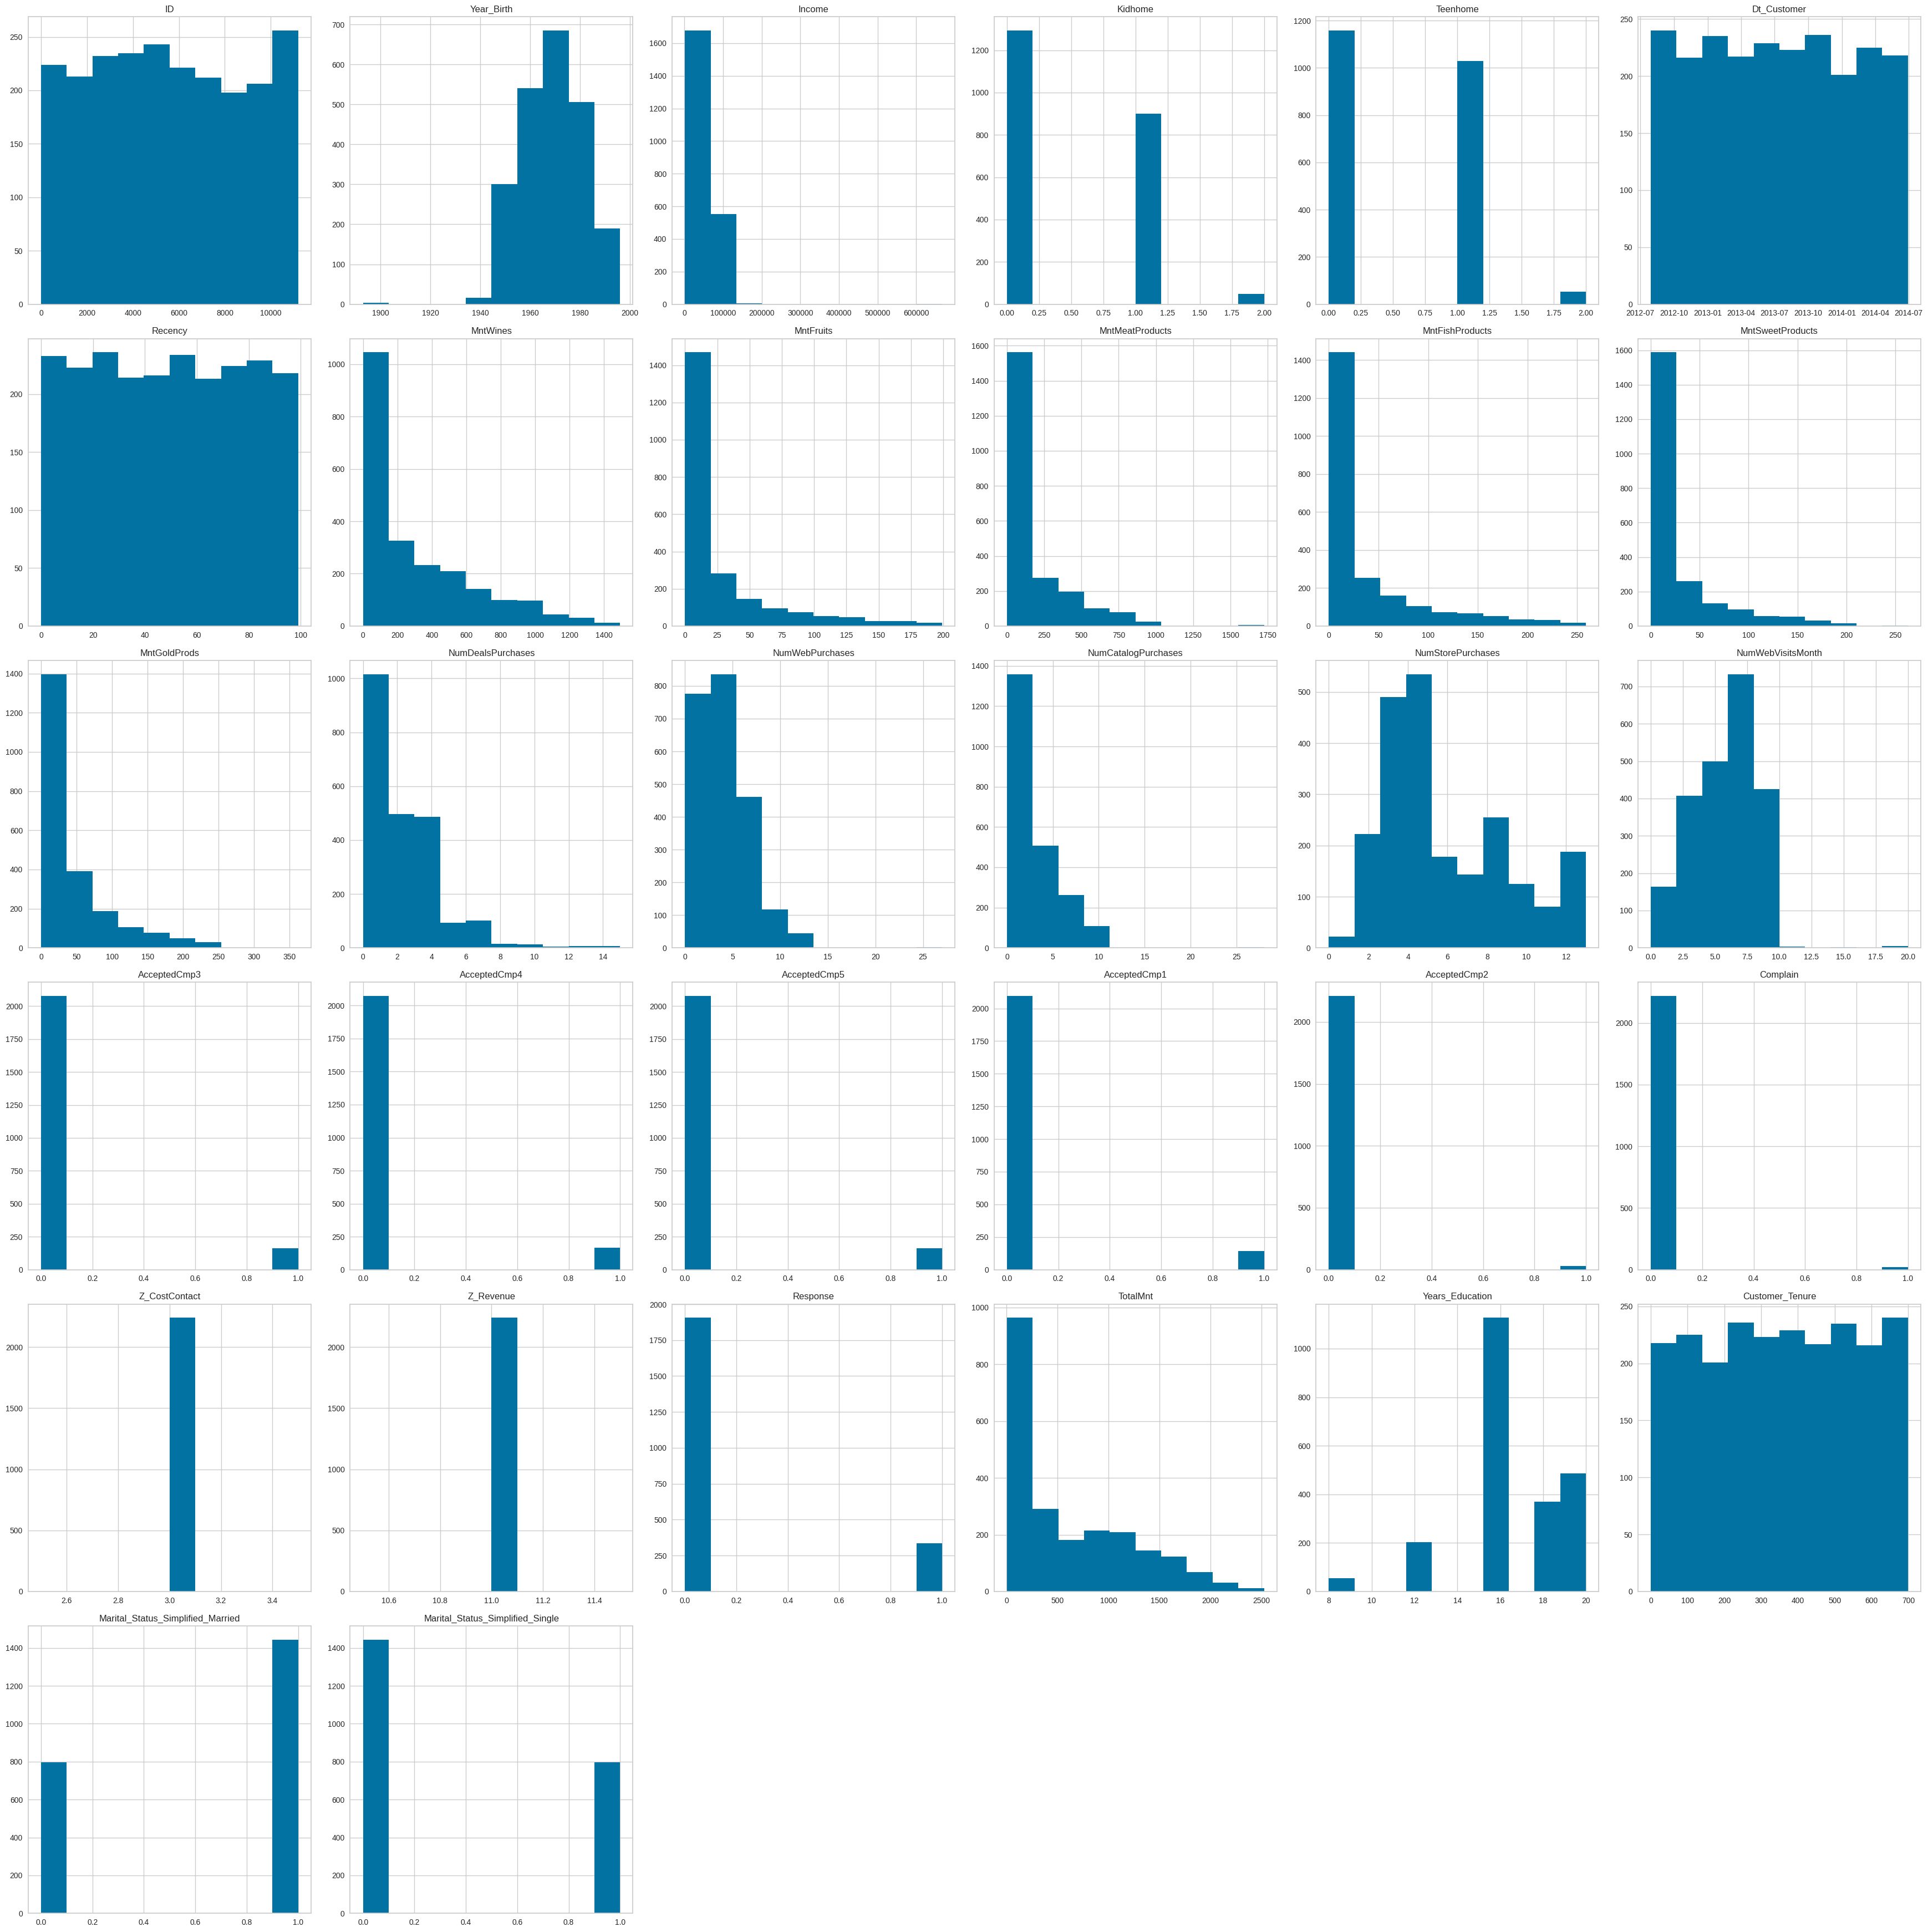

In [120]:
# Write your code here
histogram_boxplot = data.hist(figsize=(35, 35))
plt.tight_layout()
plt.show()

##### **Observations:**

All of the Amt variables (fish, meat, etc.) have a similar distribution shape (right-skewed).

Income is also right-skewed, with most customers having incomes in the lower to middle range.

Year_Birth appears to be multimodal

Most customers did not accept campaigns 1-5

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

In [121]:
# Write your code here
num_var = data.select_dtypes(include=['int64', 'float64']).drop(['Z_CostContact', 'Z_Revenue'], axis=1)
corr = num_var.corr()
display(corr)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalMnt,Years_Education,Customer_Tenure,Marital_Status_Simplified_Married,Marital_Status_Simplified_Single
ID,1.000000,0.000028,0.013036,0.002406,-0.002580,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,-0.007642,-0.013438,-0.037166,-0.018924,-0.003440,-0.014927,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,-0.021968,-0.018054,0.000034,-0.000240,0.018930,-0.018930
Year_Birth,0.000028,1.000000,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,0.021325,-0.111306,-0.189132,0.022431,0.004237,-0.004237
Income,0.013036,-0.160942,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,0.437497,0.436162,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,-0.016168,0.182791,0.334850,0.274921,0.087538,-0.027223,0.132756,0.664706,0.175395,-0.018460,0.004636,-0.004636
Kidhome,0.002406,0.230176,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,-0.080008,-0.556669,-0.058790,-0.053343,0.023532,-0.023532
Teenhome,-0.002580,-0.352111,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,-0.154446,-0.138384,0.145283,0.017465,0.030796,-0.030796
Recency,-0.046524,-0.019871,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,-0.198437,0.020433,-0.008900,0.024522,-0.004508,0.004508
MntWines,-0.022878,-0.157773,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,0.247254,0.891839,0.220747,0.166264,-0.006023,0.006023
MntFruits,0.004600,-0.017917,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,0.125289,0.614229,-0.048480,0.066928,-0.024452,0.024452
MntMeatProducts,-0.004437,-0.030872,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,0.236335,0.842965,0.067665,0.092713,-0.019620,0.019620
MntFishProducts,-0.024475,-0.041625,0.437497,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.293681,0.534478,0.459855,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,0.111331,0.642818,-0.076500,0.080769,-0.017125,0.017125


In [122]:
# Write your code here
threshold = 0.5 # Define the threshold for strong correlation

for i in range(len(corr.columns)): # Iterate through the columns of the correlation matrix
  for j in range(i+1, len(corr.columns)): # Iterate through the columns of the correlation matrix
    var1=corr.columns[i]
    var2=corr.columns[j]
    value=corr.iloc[i,j] # Get the correlation value from the corr DataFrame

    if abs(value)>=threshold:
      direction="positive" if value>0 else "negative"
      print(f"• {var1} and {var2} have a **strong {direction} correlation** of {value:.2f}")

• Income and MntWines have a **strong positive correlation** of 0.58
• Income and MntMeatProducts have a **strong positive correlation** of 0.58
• Income and NumCatalogPurchases have a **strong positive correlation** of 0.59
• Income and NumStorePurchases have a **strong positive correlation** of 0.53
• Income and NumWebVisitsMonth have a **strong negative correlation** of -0.55
• Income and TotalMnt have a **strong positive correlation** of 0.66
• Kidhome and NumCatalogPurchases have a **strong negative correlation** of -0.50
• Kidhome and TotalMnt have a **strong negative correlation** of -0.56
• MntWines and MntMeatProducts have a **strong positive correlation** of 0.56
• MntWines and NumWebPurchases have a **strong positive correlation** of 0.54
• MntWines and NumCatalogPurchases have a **strong positive correlation** of 0.64
• MntWines and NumStorePurchases have a **strong positive correlation** of 0.64
• MntWines and TotalMnt have a **strong positive correlation** of 0.89
• MntFr

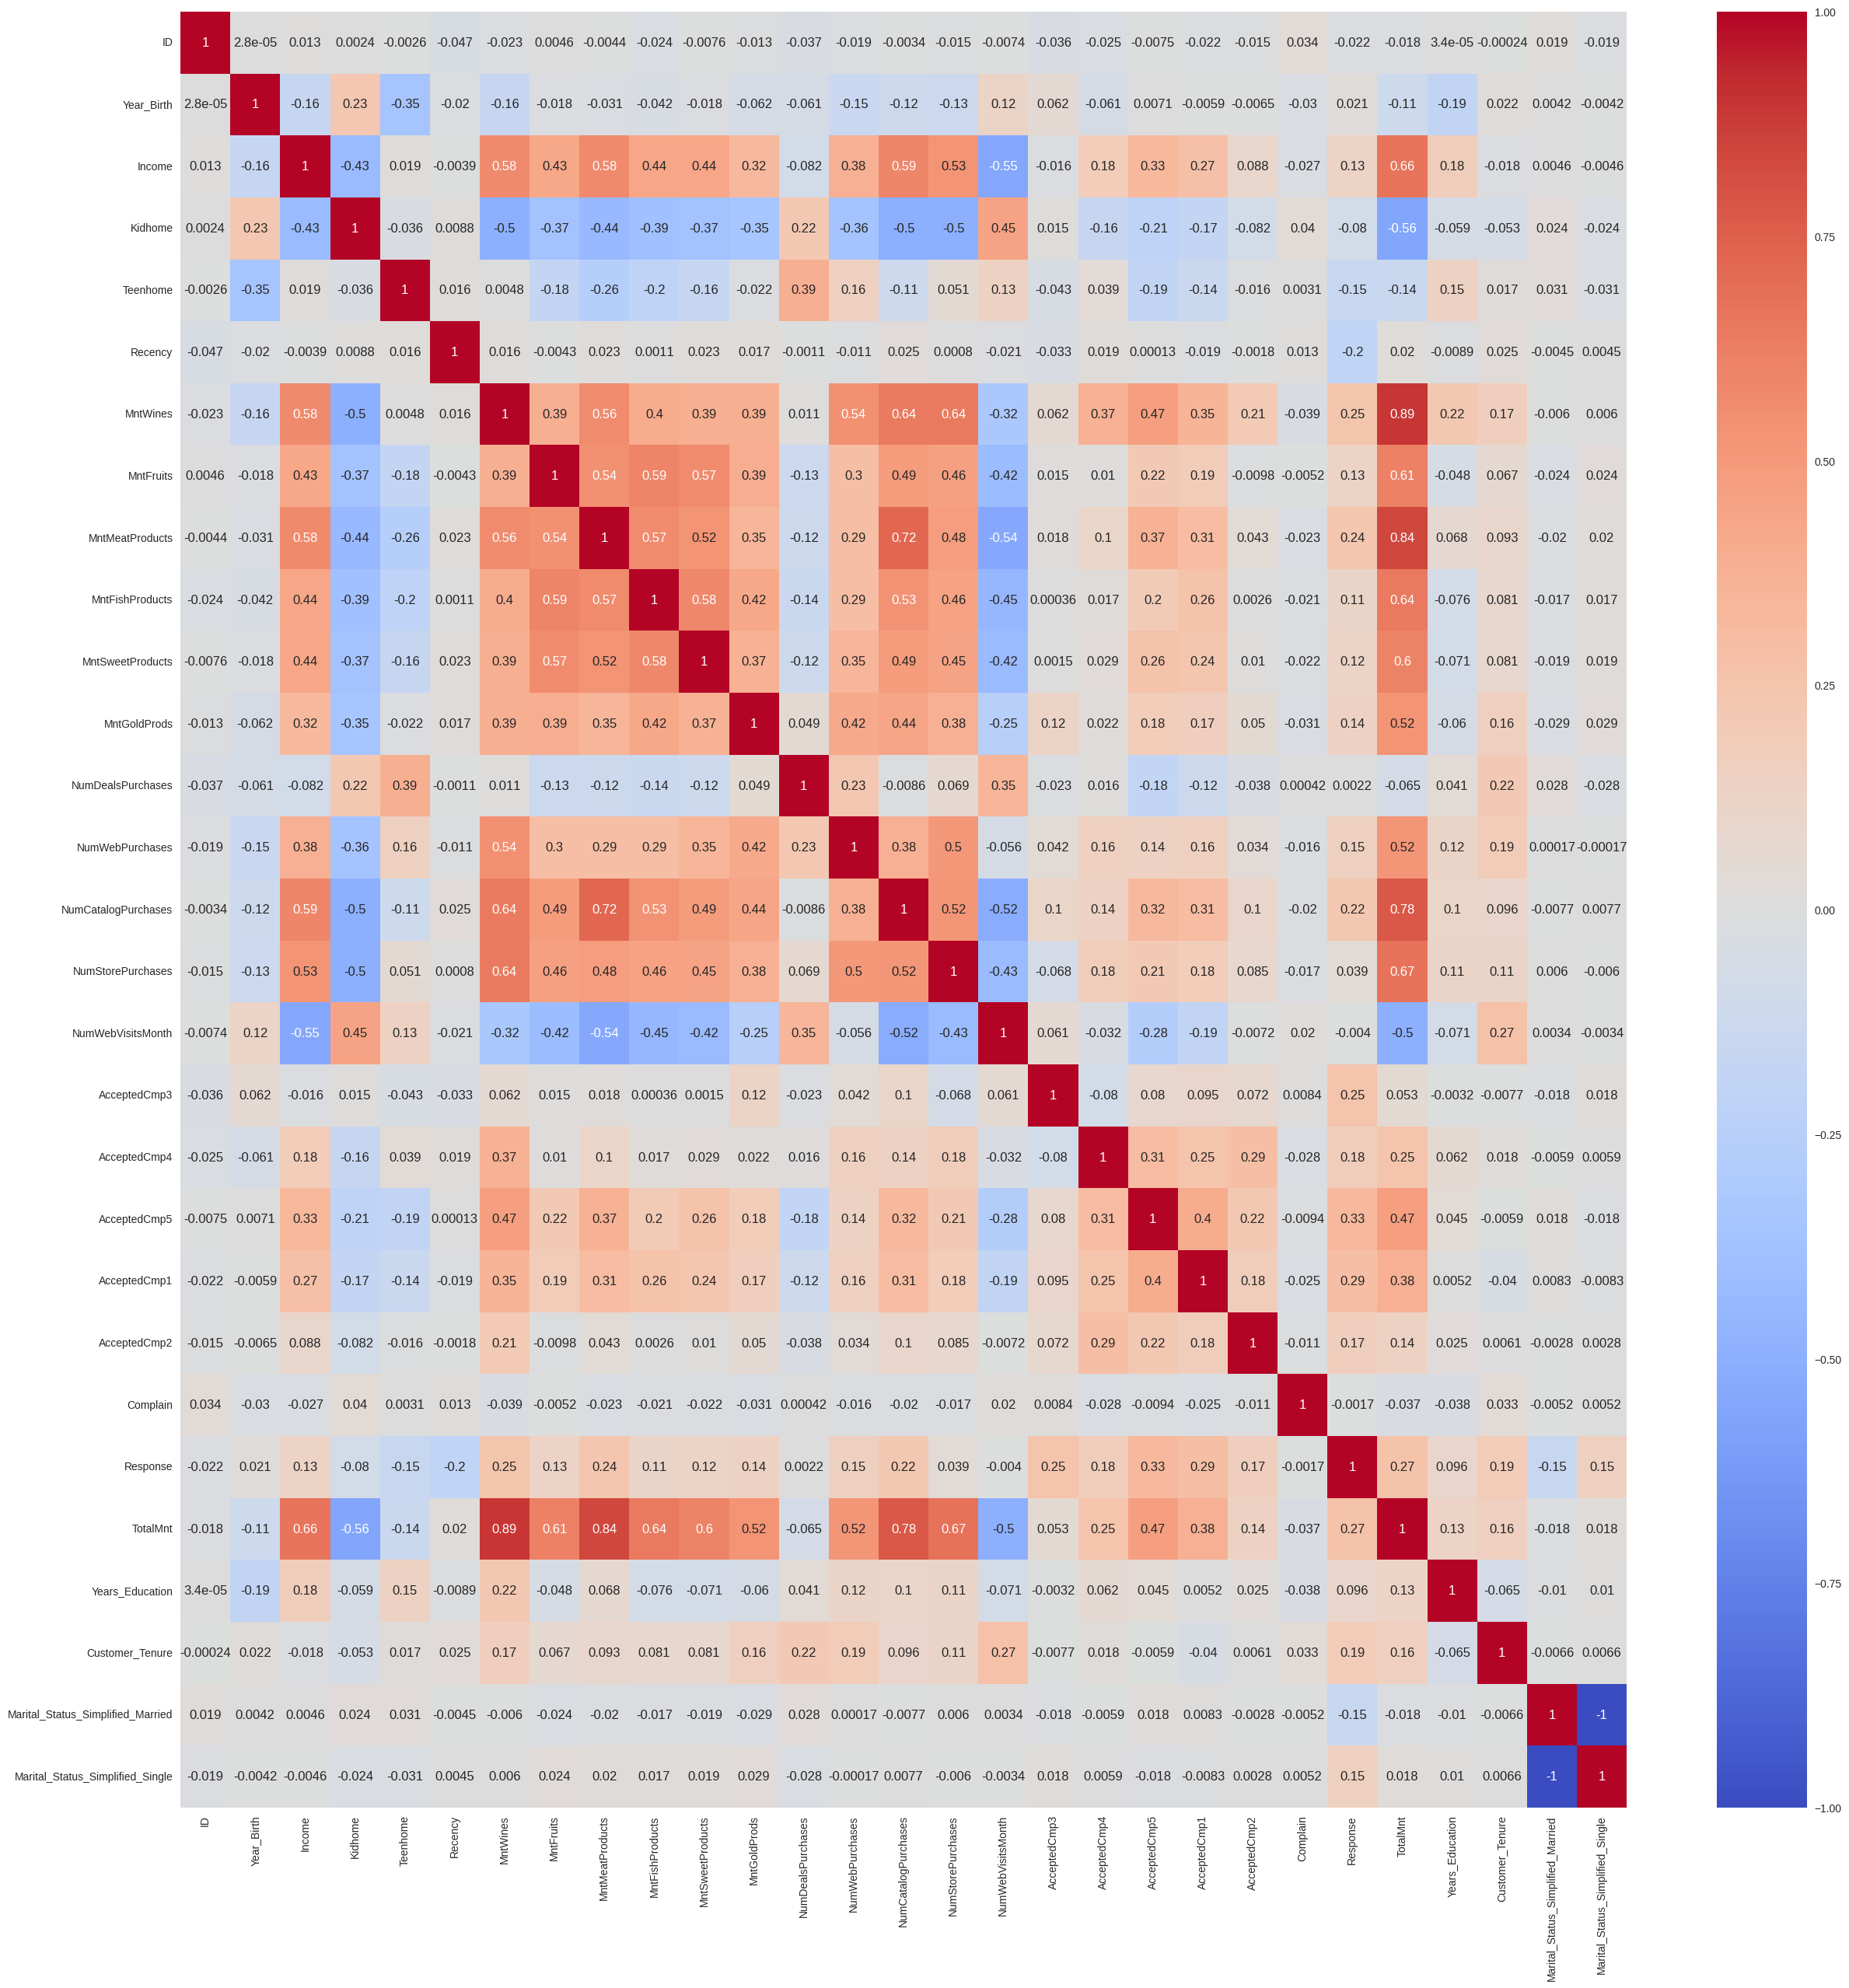

In [123]:
plt.figure(figsize=(30,30))
sns.heatmap(corr, annot=True, cmap='coolwarm',
    xticklabels = corr.columns,
    yticklabels = corr.columns)
plt.show()

##### **Observations:**

Purchasing from a catalog appears to be more strongly correlated with income than purchasing from the internet.

Higher-income families visit the company's website less, but still spend more money buying online than their lower-income counterparts.

All Mnt variables (meat, fish, etc.) are strongly correlated with one another and share similar interactions with other variables. I will generate a TotalMnt variable to make analysis simpler.

Families with more young children at home spent less and made fewer catalog purchases. This relationship does not hold for families with teenagers at home; the presence of teenager does not seem to have any strong effect on families' spending habits.

All Purchase Method variables (NumWebPurchases, etc.) are positively correlated, suggesting that those families which engage strongly with one spending practice tend to engage, to some extent, with all of them.

## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

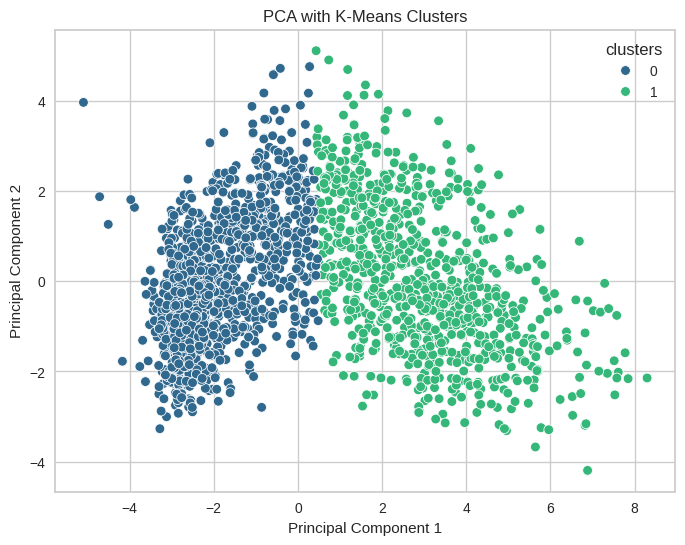

In [124]:
 # Write your code here
from sklearn.decomposition import PCA
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_var)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['clusters'] = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='principal_component_1', y='principal_component_2', hue='clusters', palette='viridis', legend='full')
plt.title('PCA with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

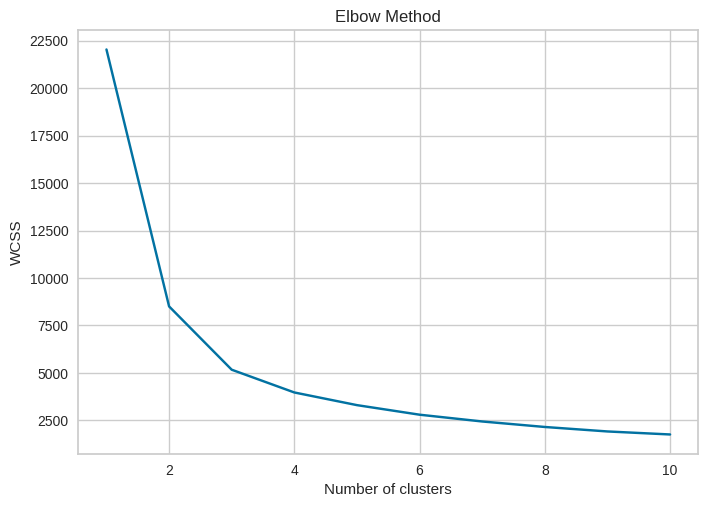

In [125]:
wcss = [] # Initialize wcss list
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(pca_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### **Observations:**

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

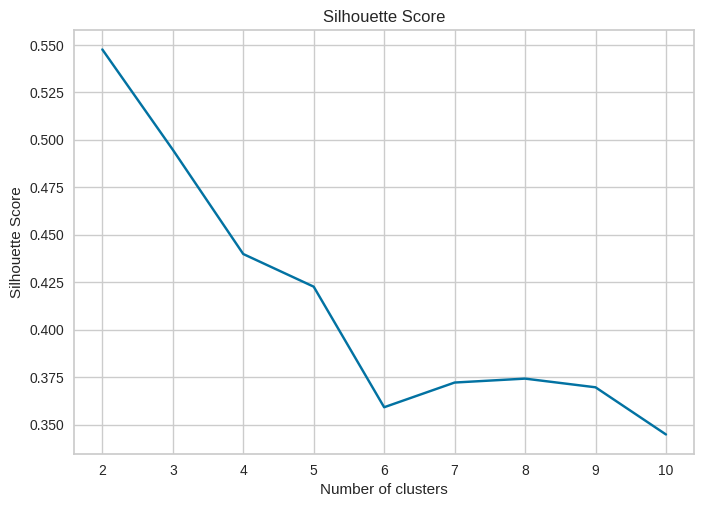

Silhouette Scores for different numbers of clusters:
For k = 2: 0.548
For k = 3: 0.495
For k = 4: 0.440
For k = 5: 0.423
For k = 6: 0.359
For k = 7: 0.372
For k = 8: 0.374
For k = 9: 0.370
For k = 10: 0.345


In [126]:
# Write your code here
silhouette_scores=[]
for k in range (2,11):
  kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
  labels=kmeans.fit_predict(pca_df)
  score=silhouette_score(pca_df, labels)
  silhouette_scores.append(score)

plt.plot(range(2,11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

print("Silhouette Scores for different numbers of clusters:")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_df)
    score = silhouette_score(pca_df, labels)
    silhouette_scores.append(score)
    print(f"For k = {k}: {score:.3f}")

##### **Observations:**

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [127]:
# Write your code here
%%time
kmeans=KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(pca_df)

CPU times: user 30.7 ms, sys: 0 ns, total: 30.7 ms
Wall time: 17.7 ms


KMeans(n_clusters=2, n_init=10, random_state=42)

##### **Observations:**

K-Means takes 46.7ms to run.

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

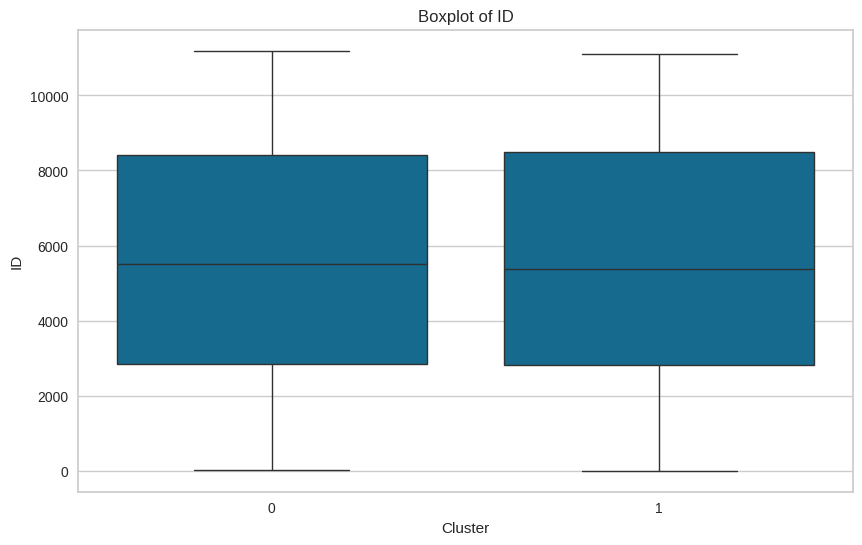

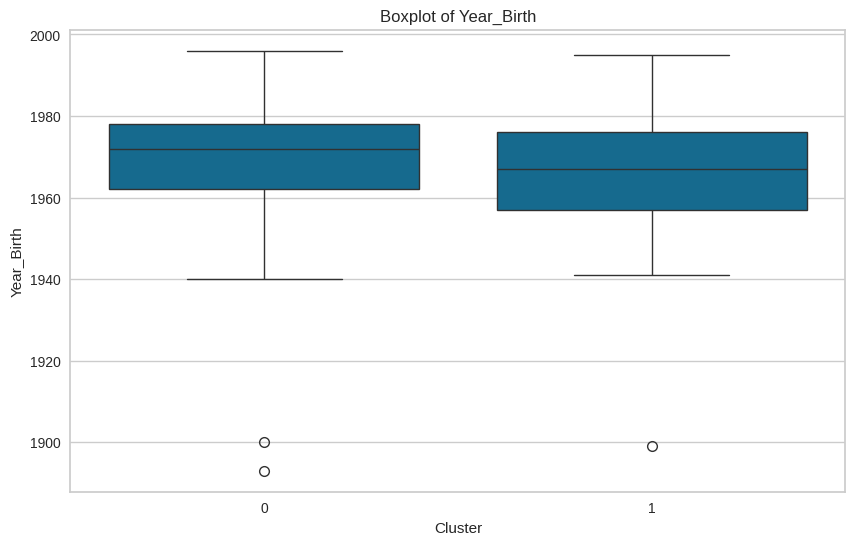

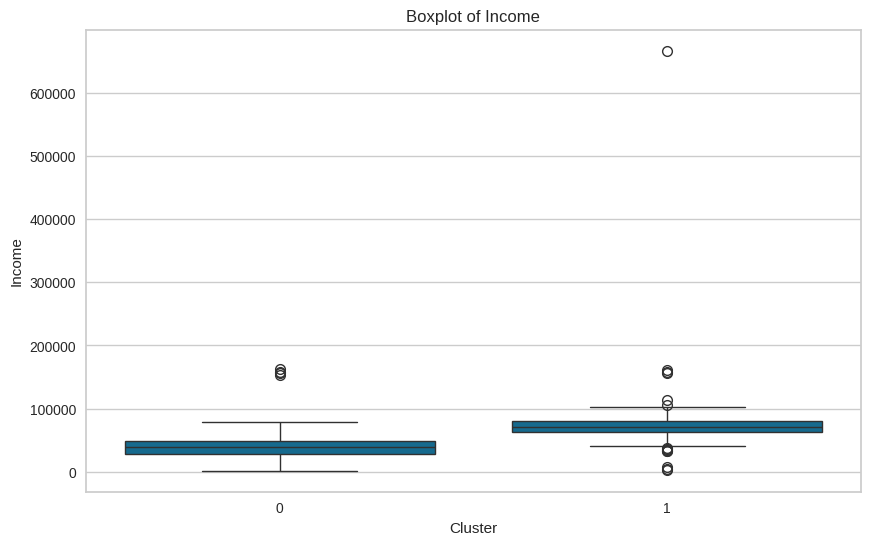

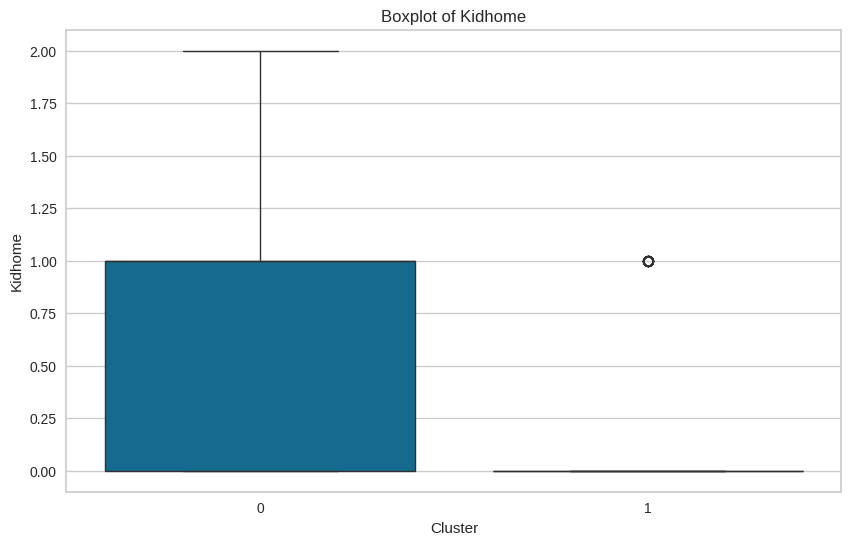

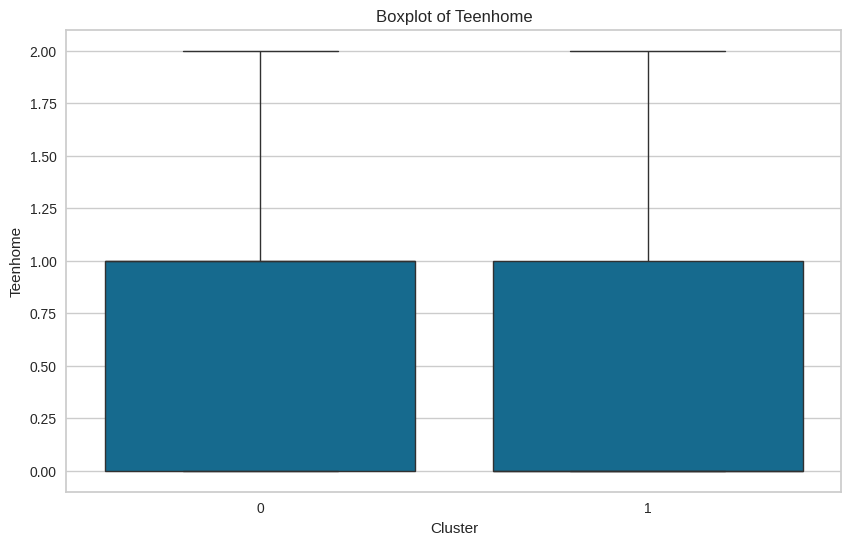

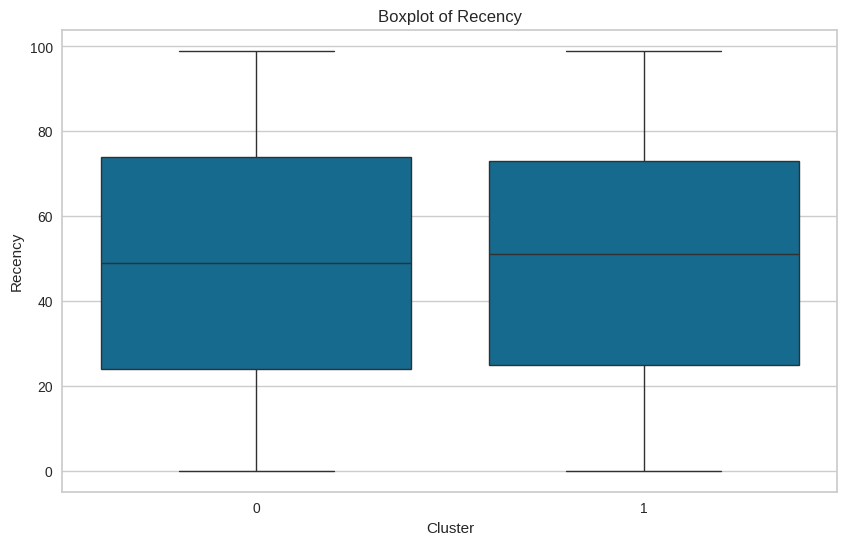

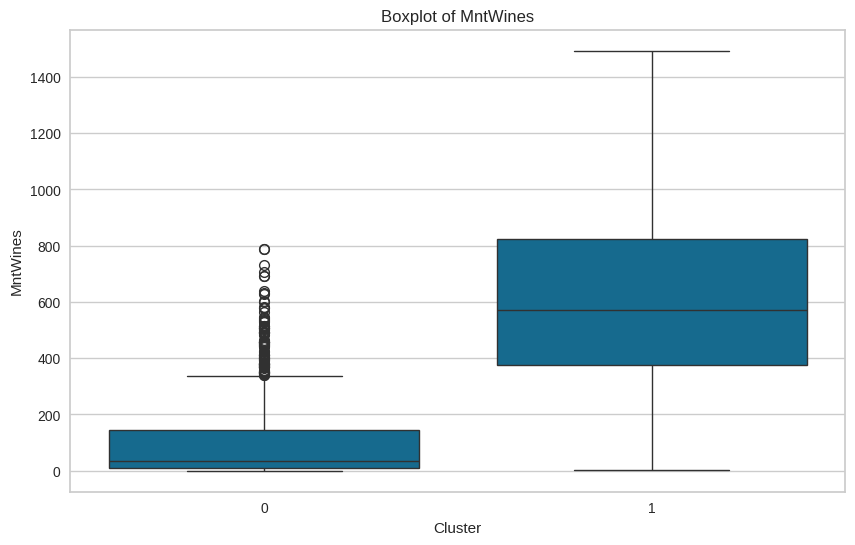

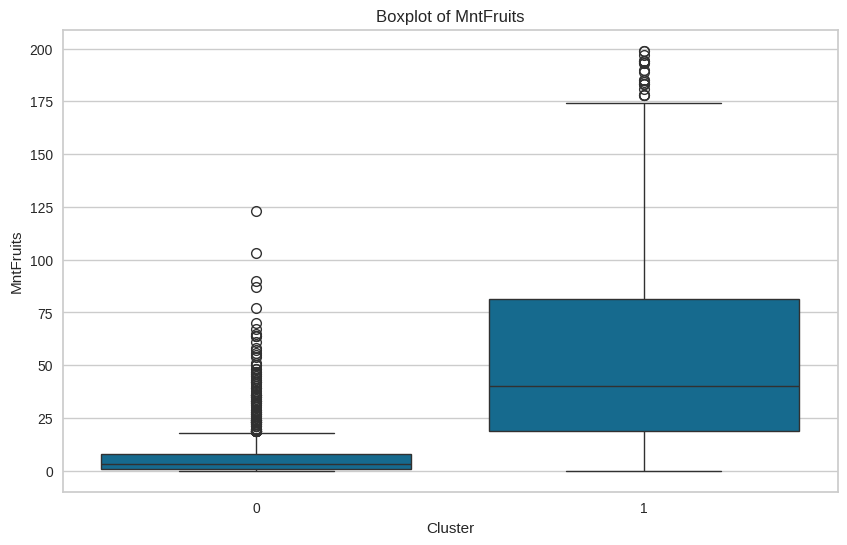

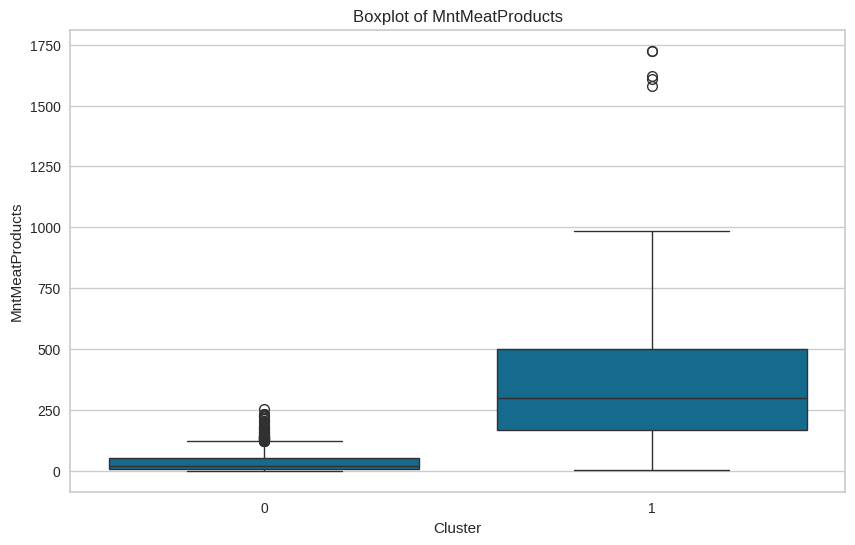

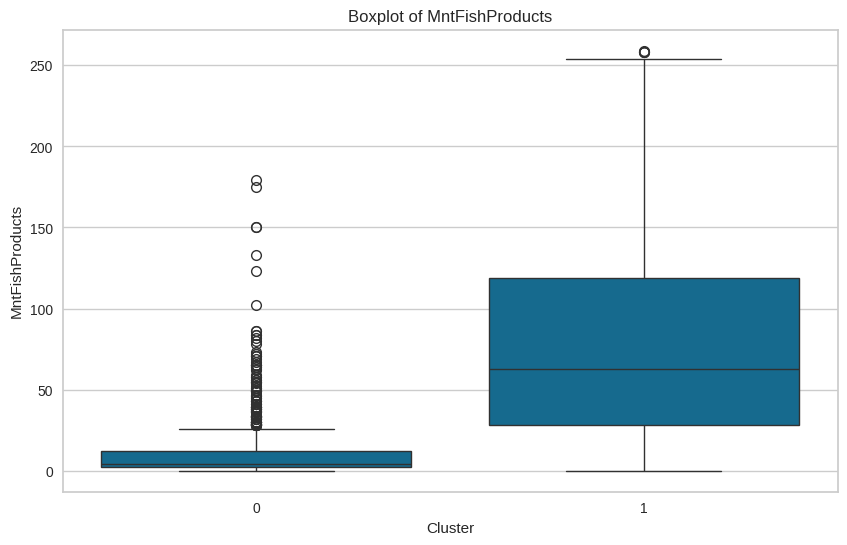

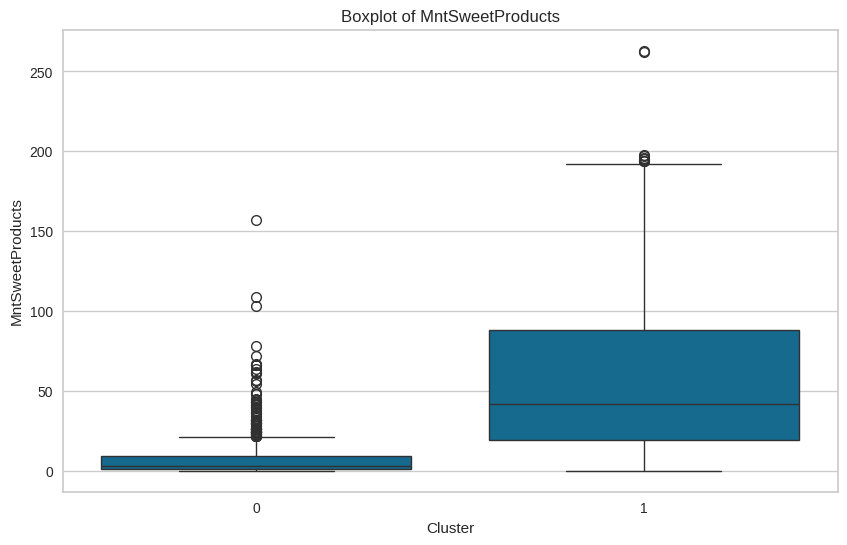

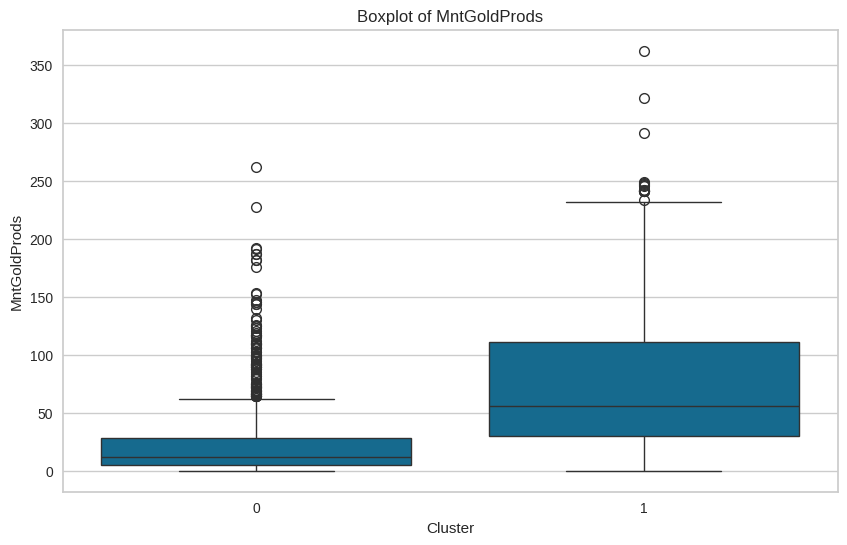

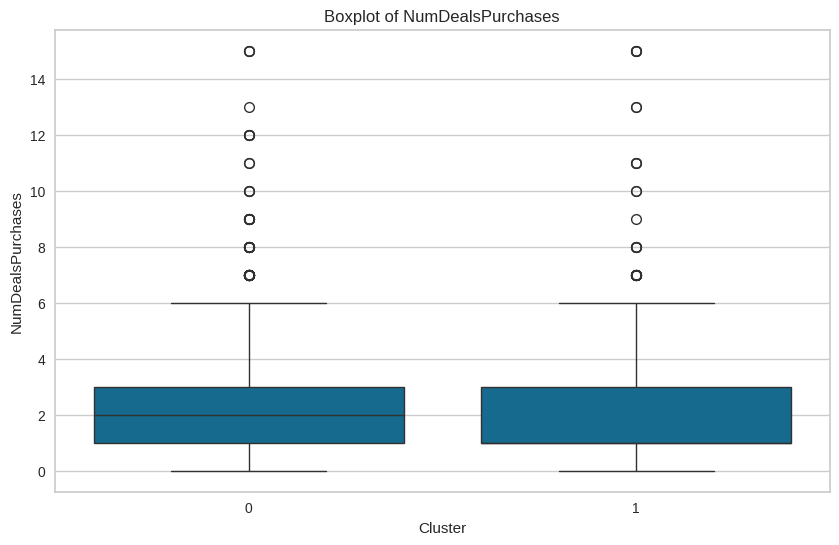

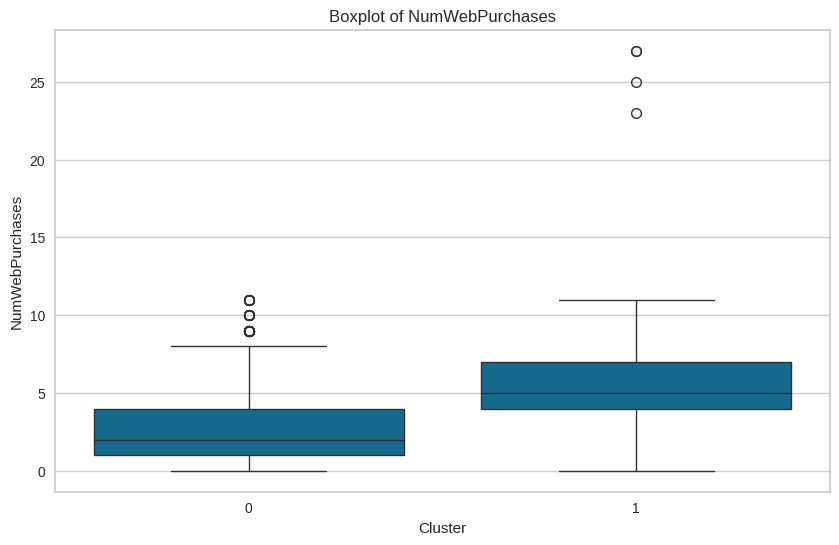

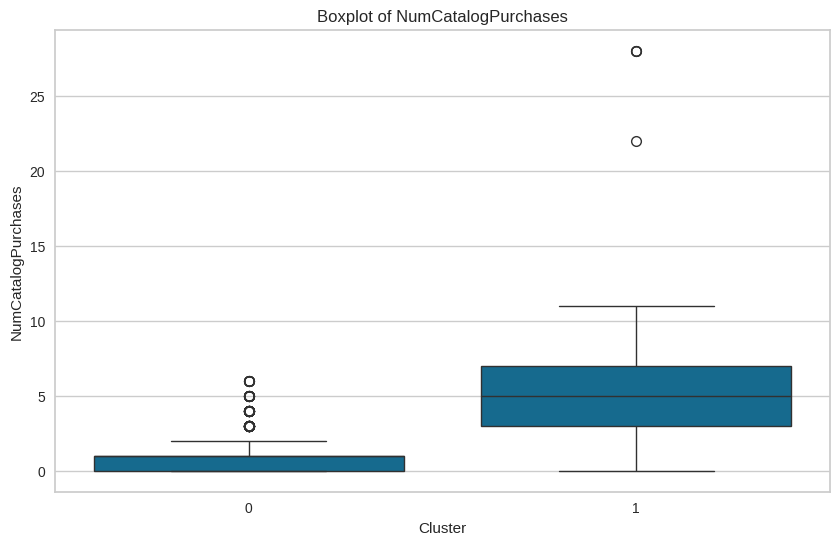

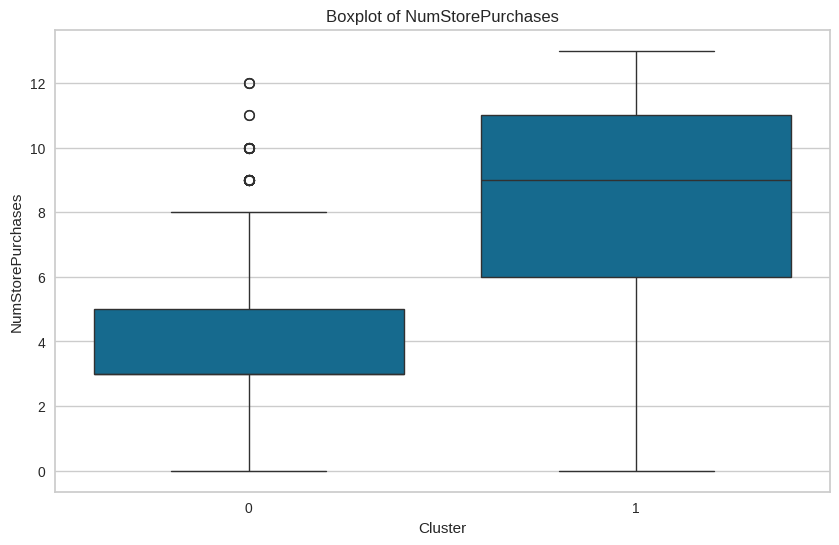

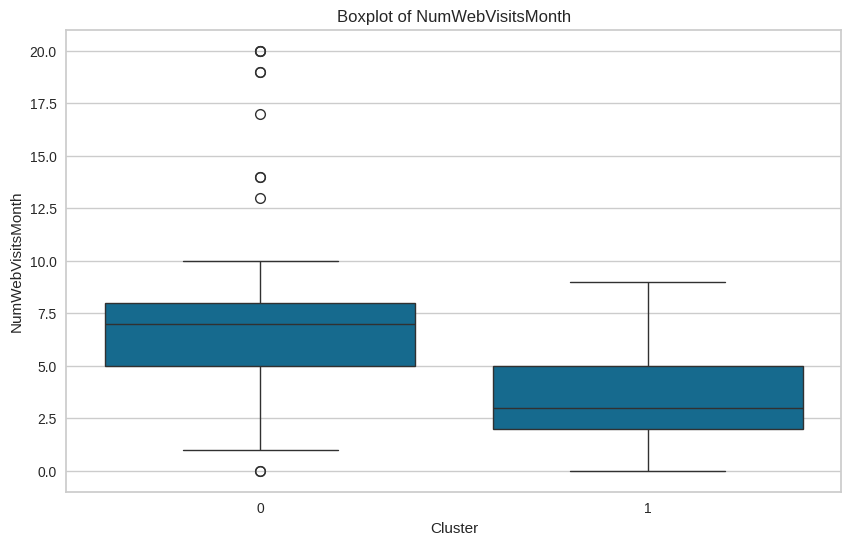

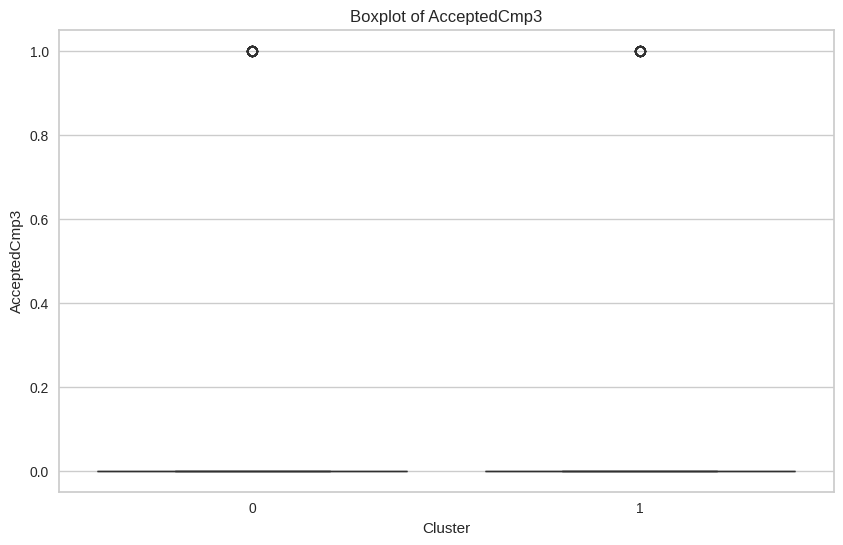

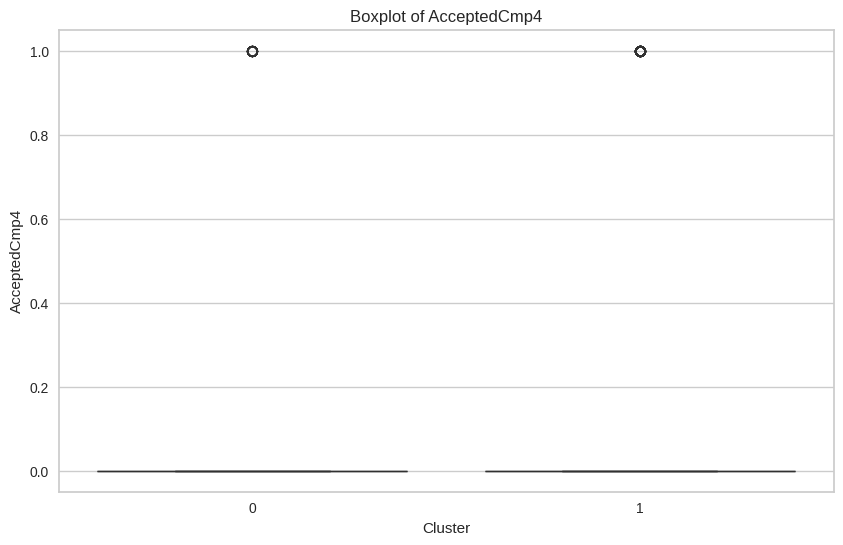

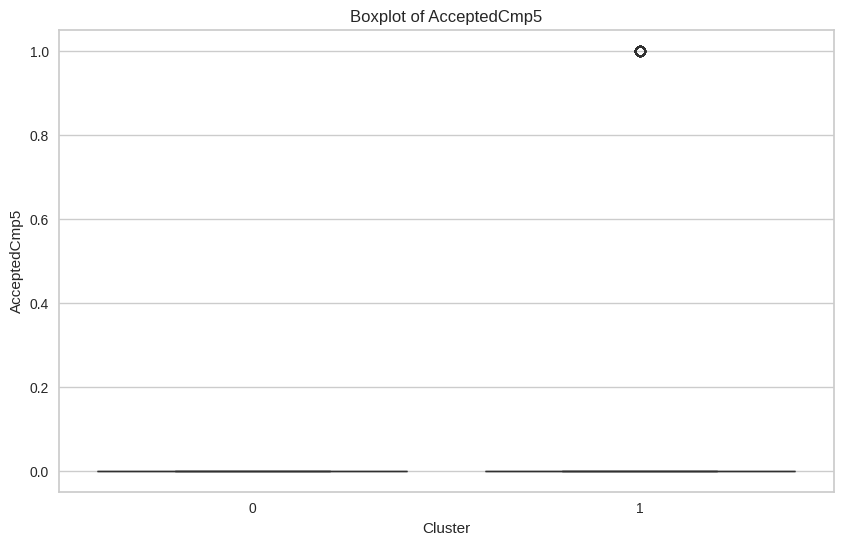

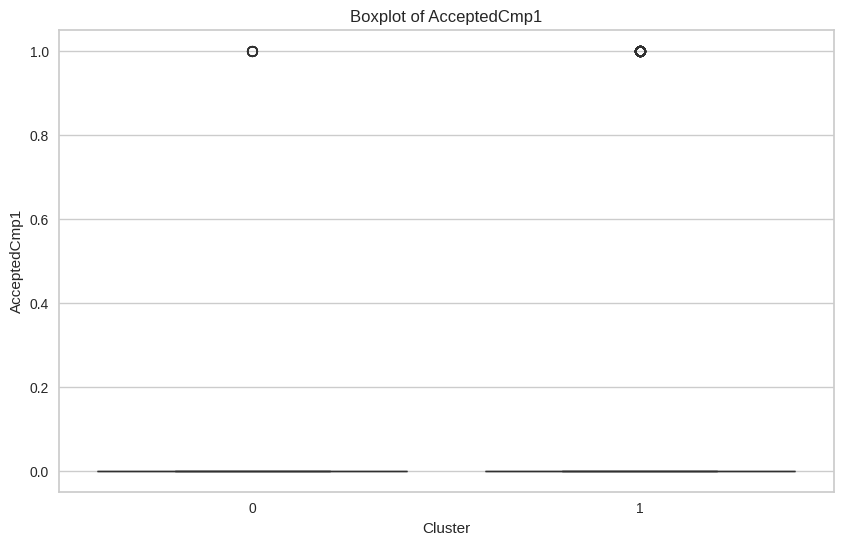

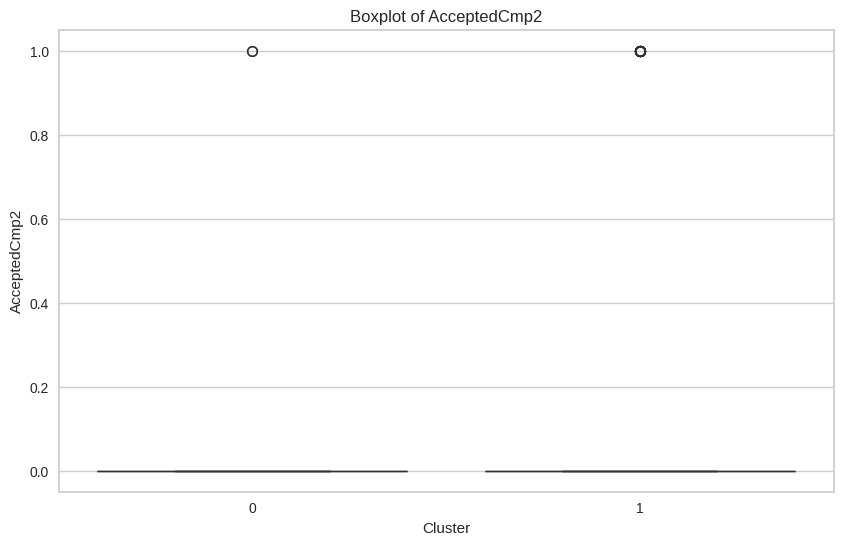

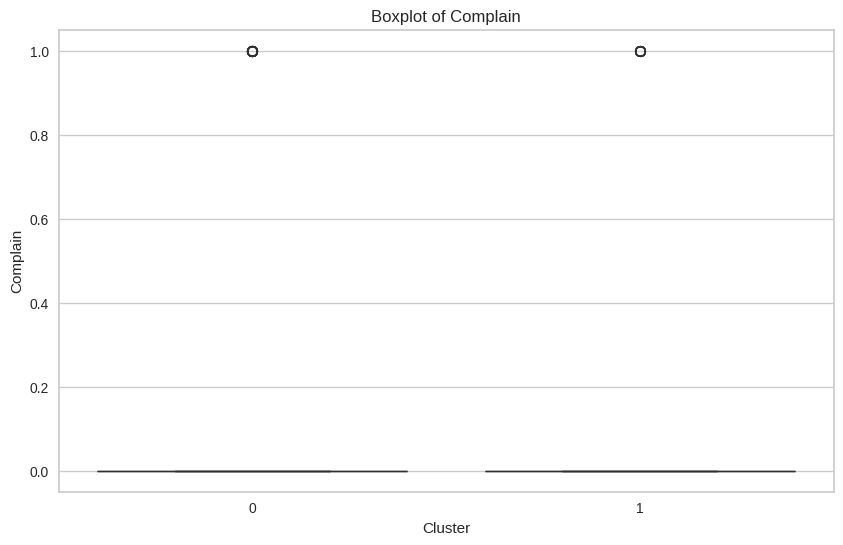

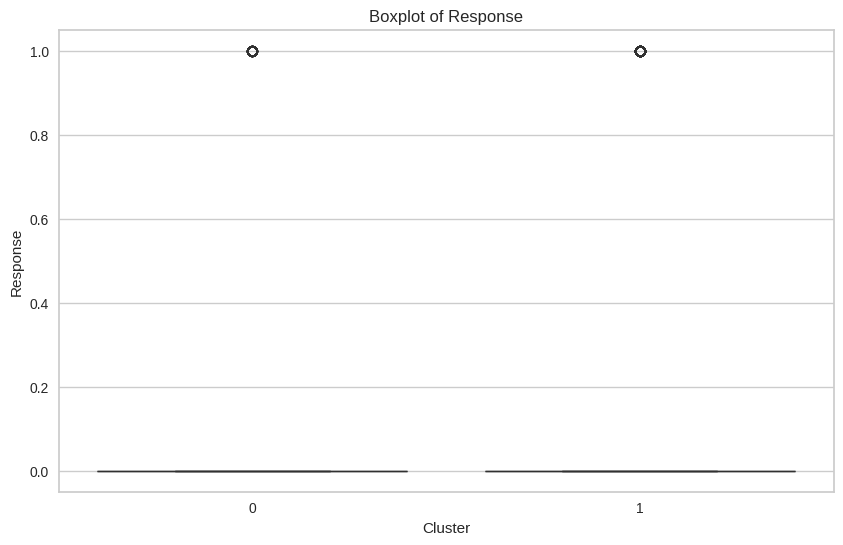

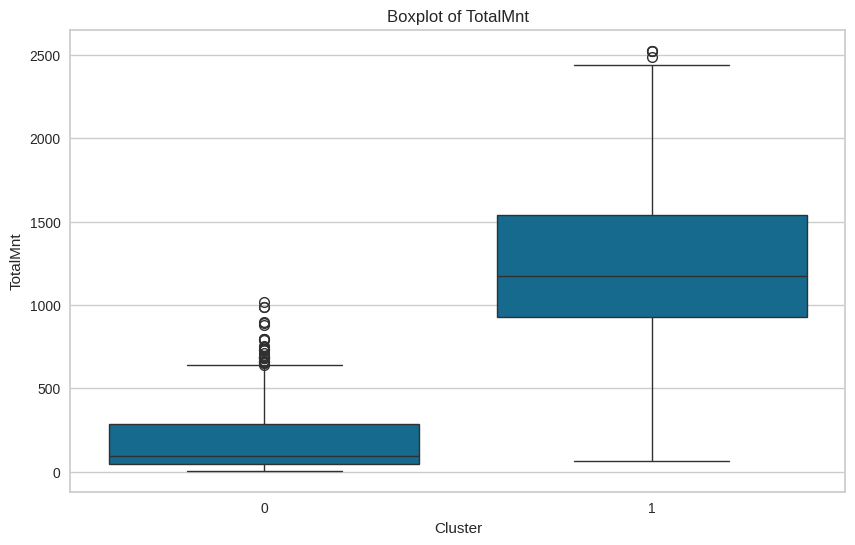

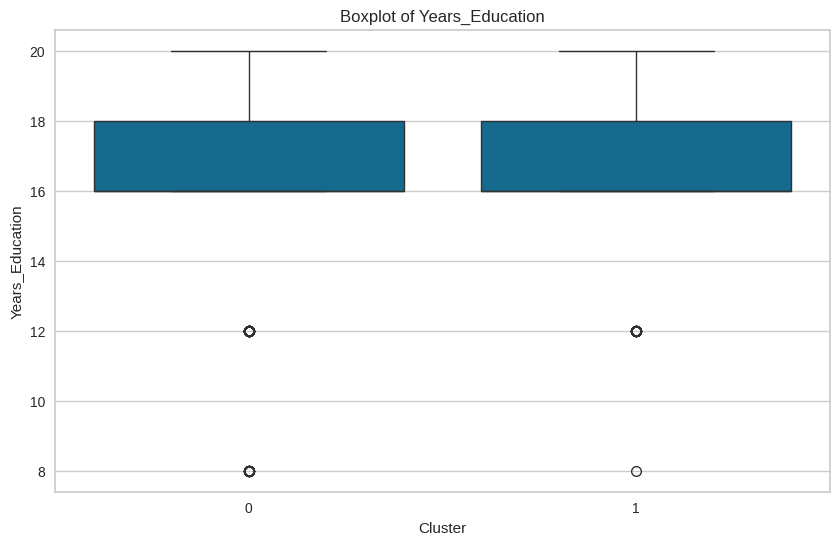

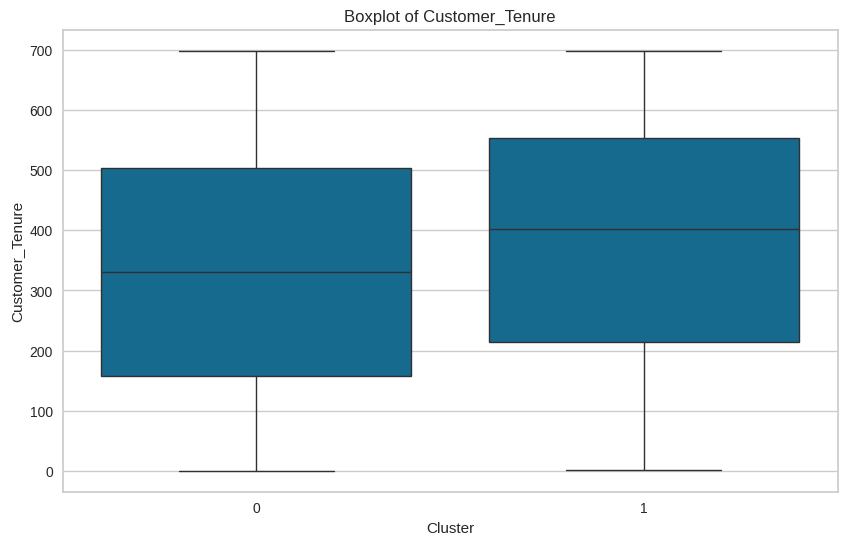

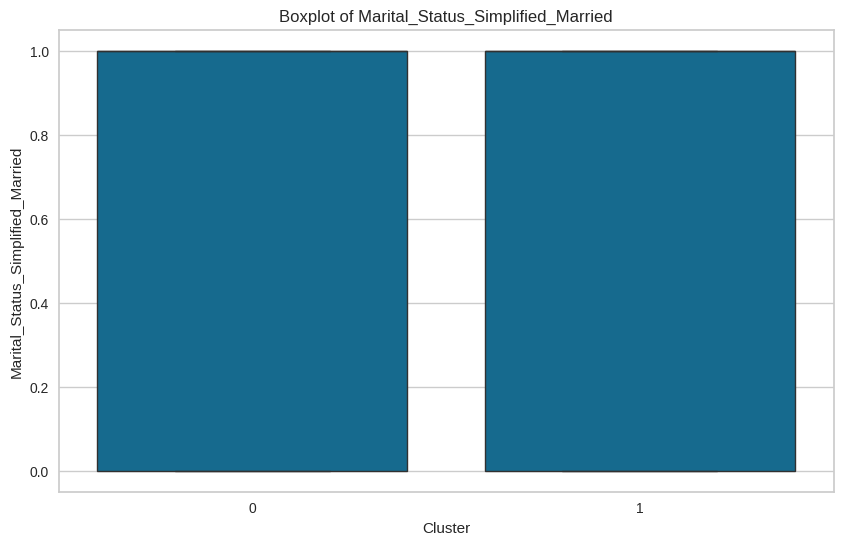

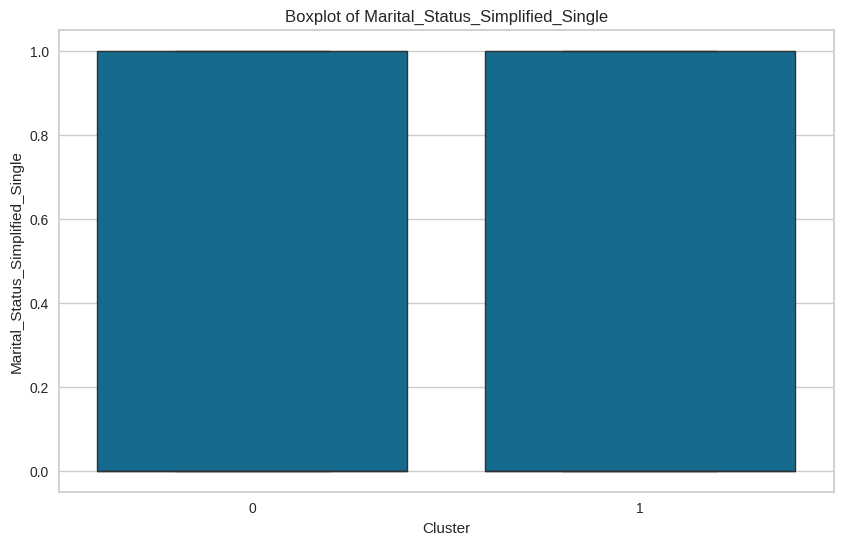

In [128]:
# Write your code here
data['Cluster']=kmeans.labels_
for feature in num_var.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(x='Cluster', y=feature, data=data)
  plt.title(f'Boxplot of {feature}')
  plt.show()

##### **Observations:**

Cluster 1 families tend to be older than Cluster 0 families.

Cluster 1 families tend to earn more, spend more, and have fewer children than Cluster 0 families.

Cluster 1 families are less inclined to take advantage of sales than Cluster 0 families.

Cluster 1 families tend to be more educated than Cluster 0 families.

Cluster 1 families are slightly more likely to marry than Cluster 0 families, and are slightly more likely to be married than single.



#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

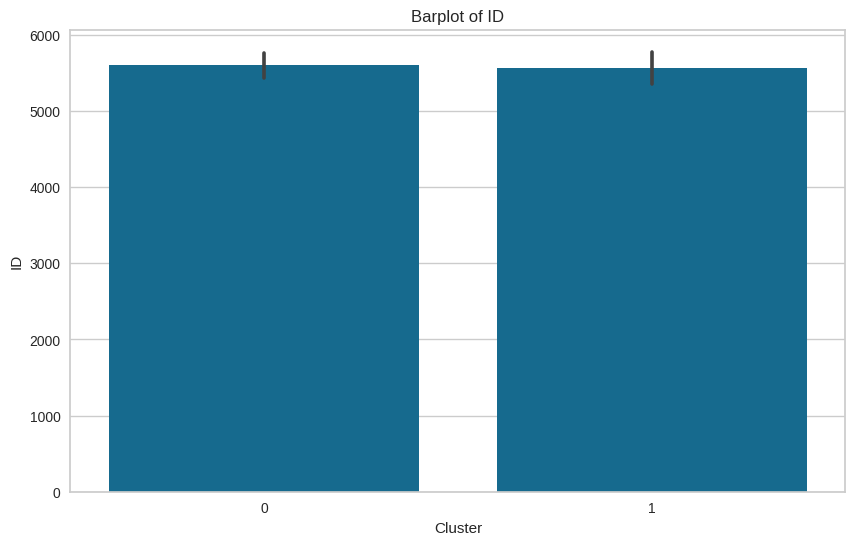

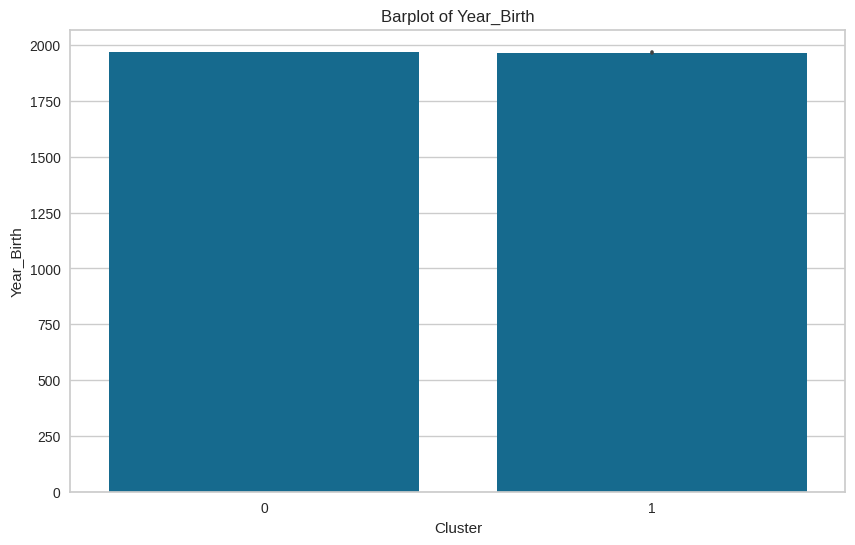

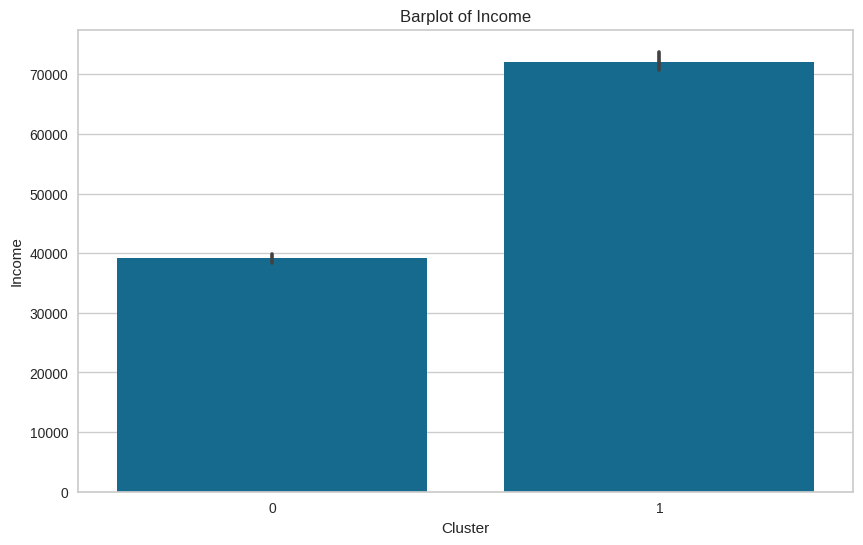

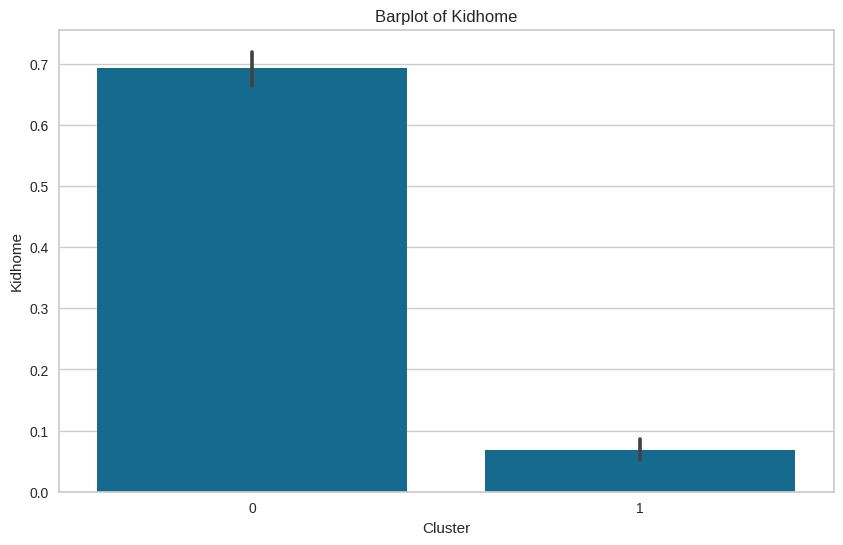

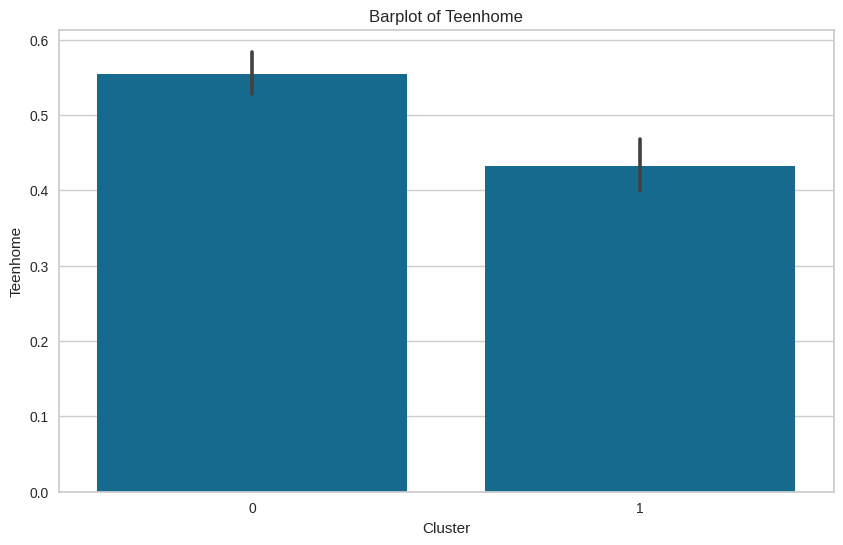

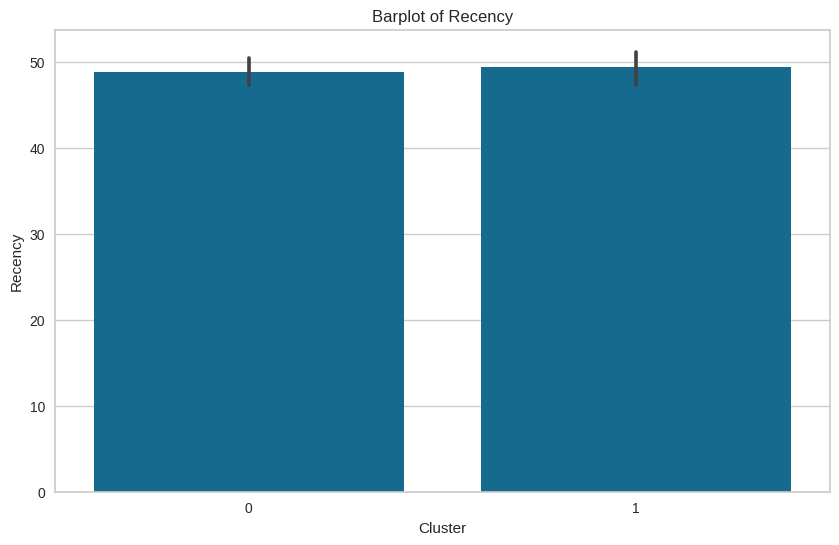

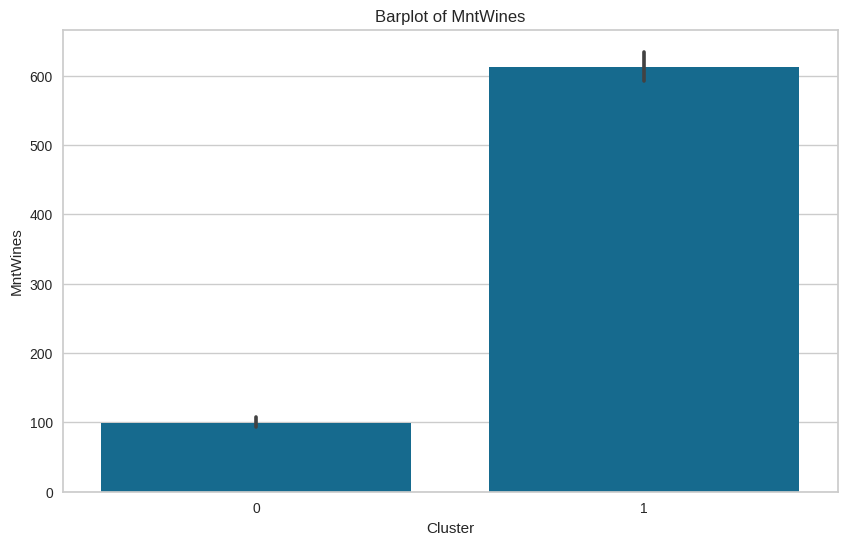

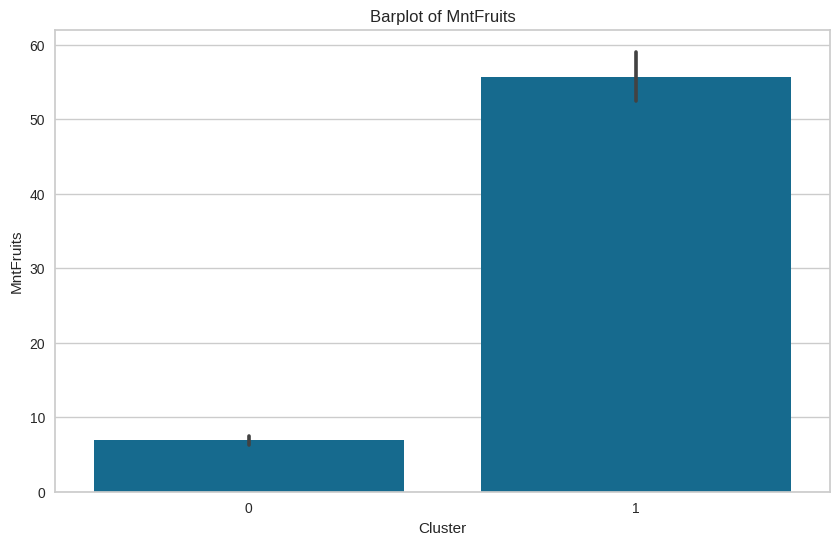

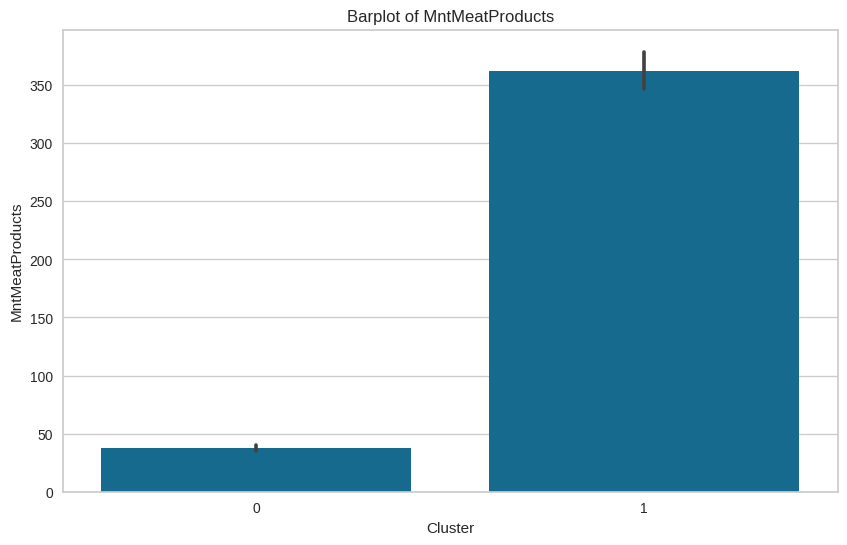

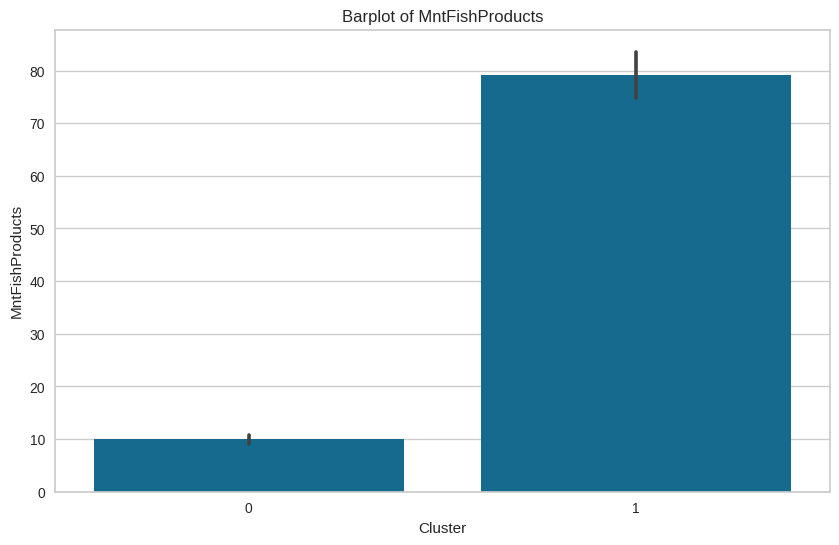

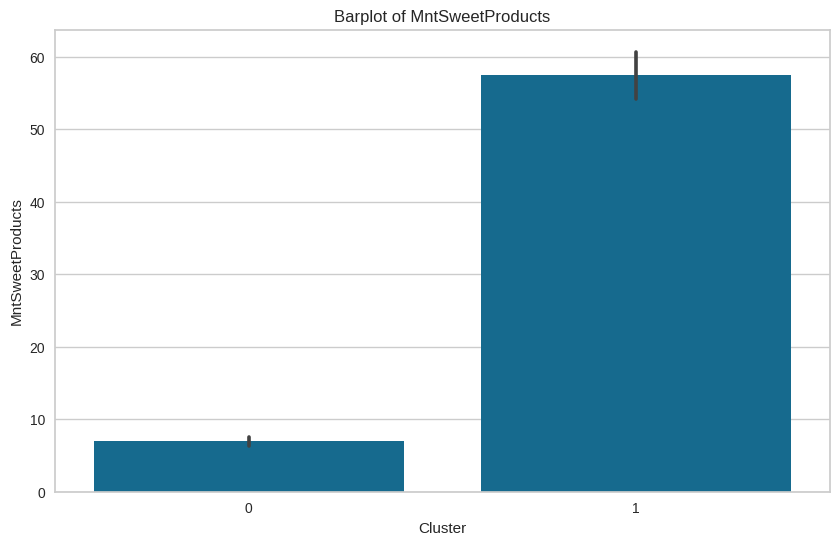

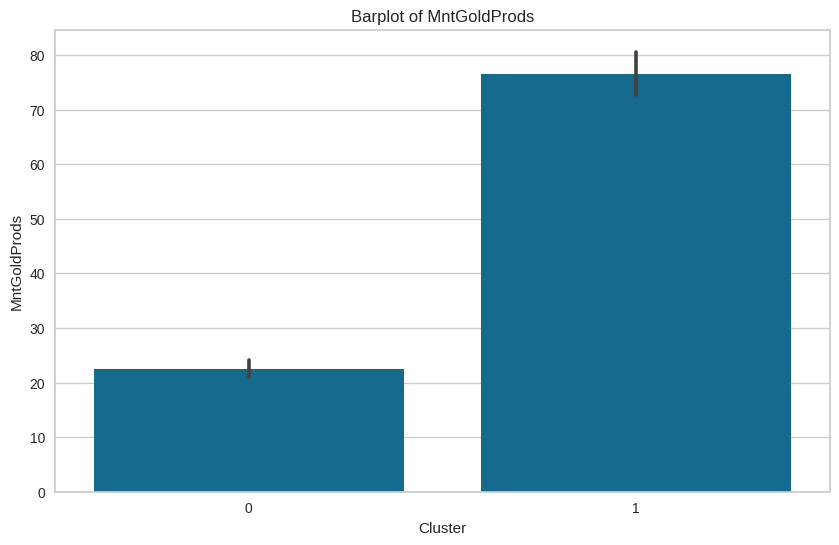

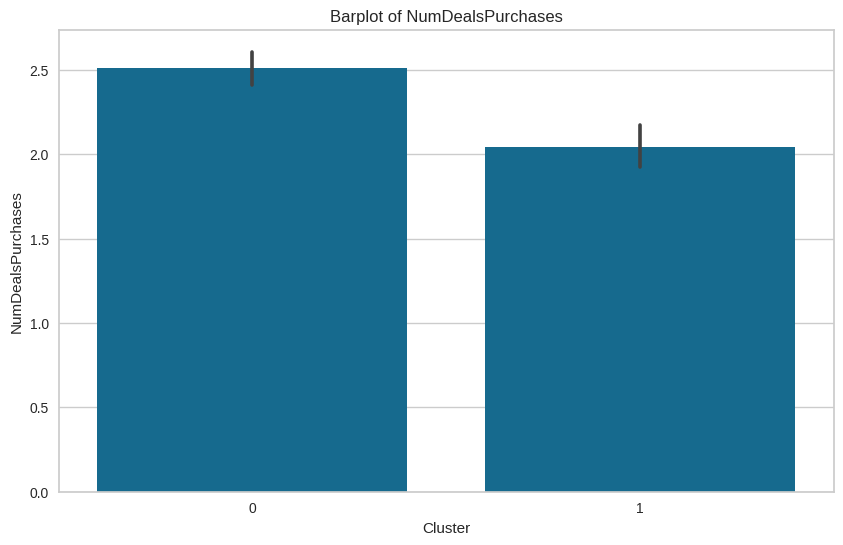

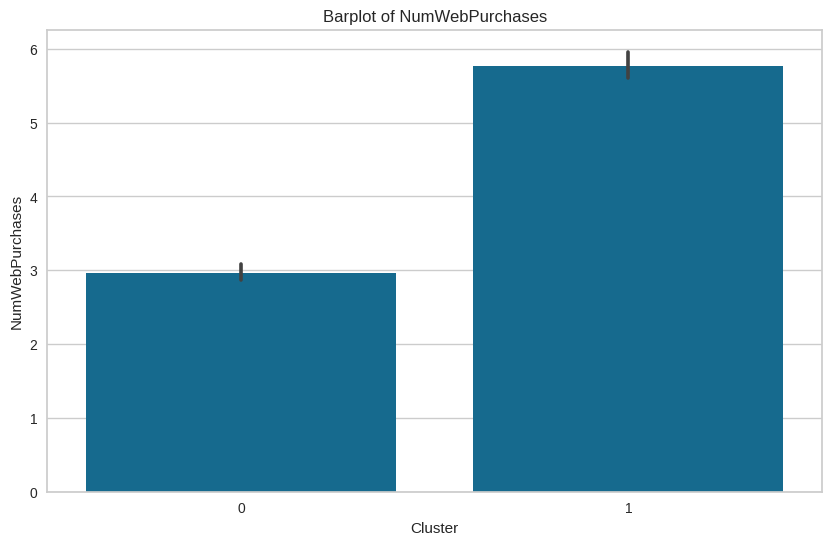

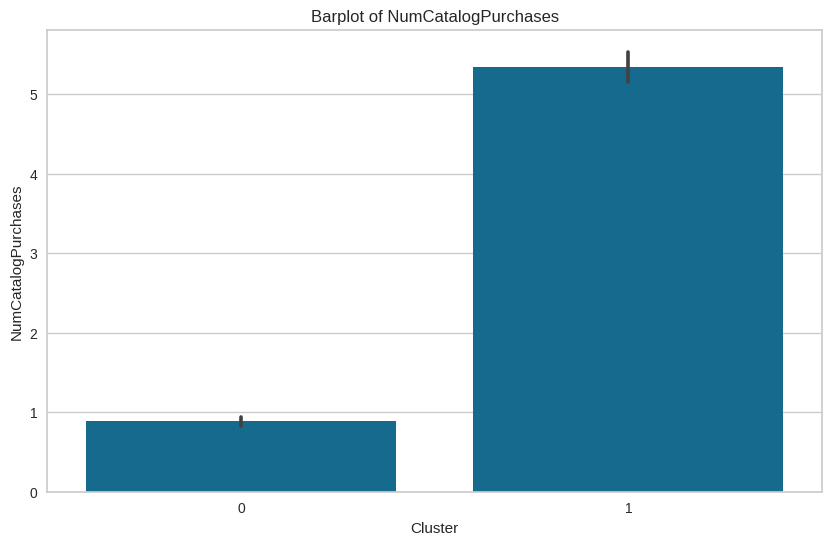

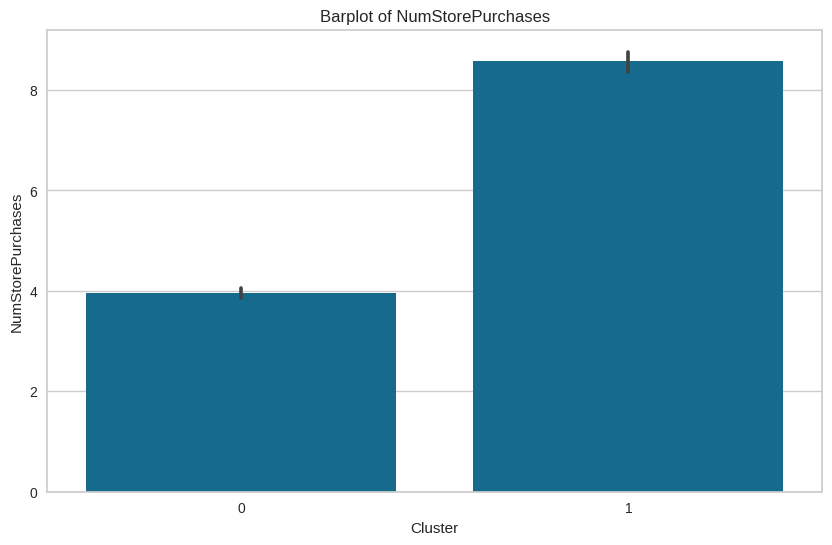

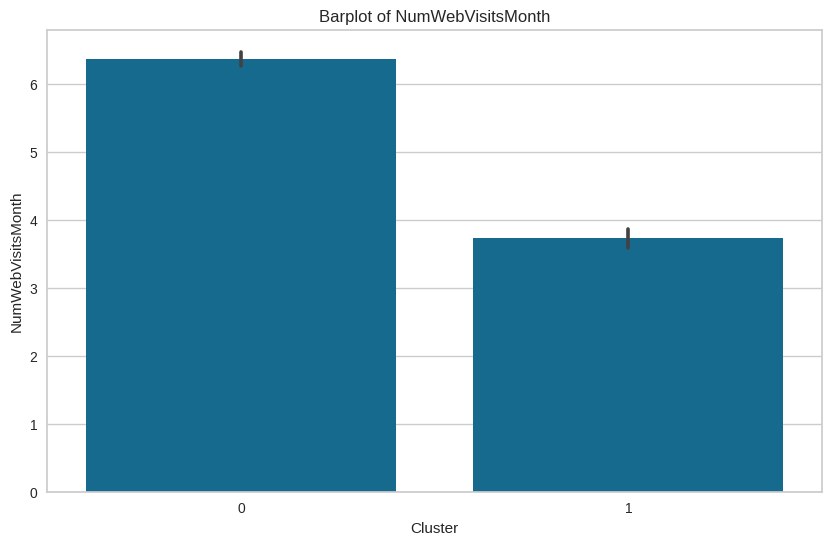

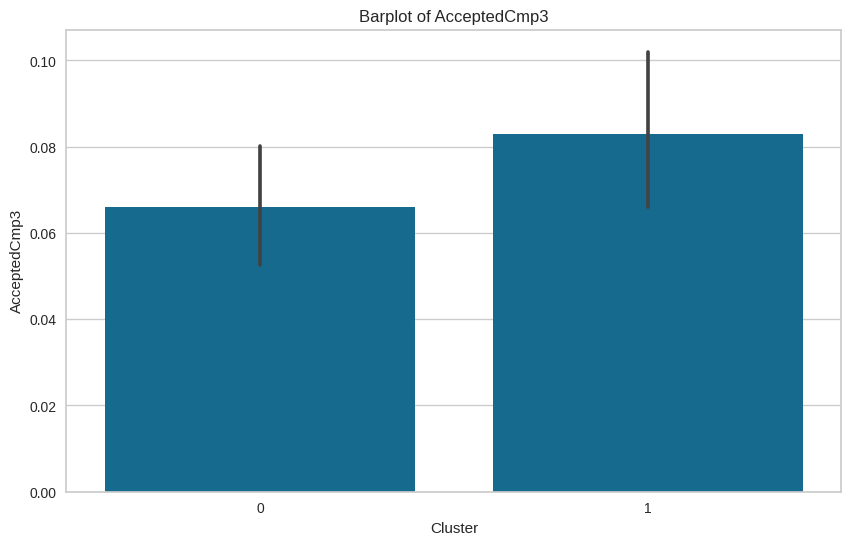

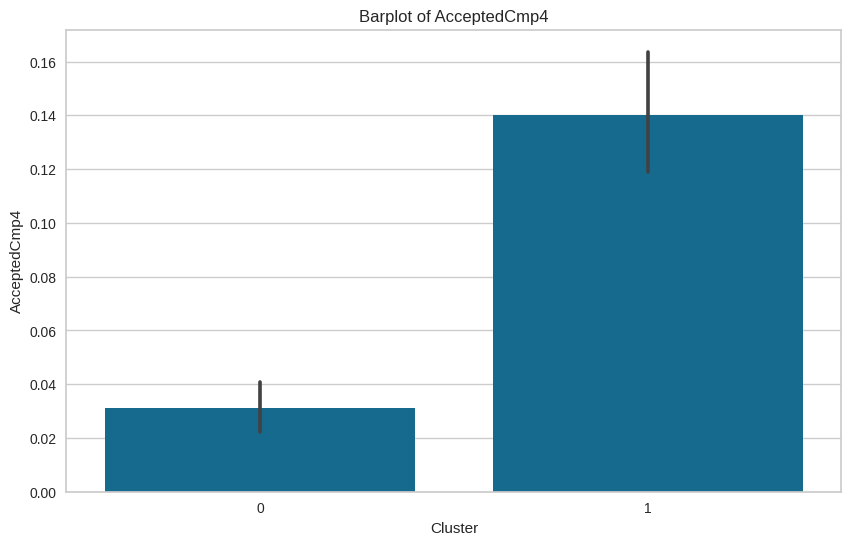

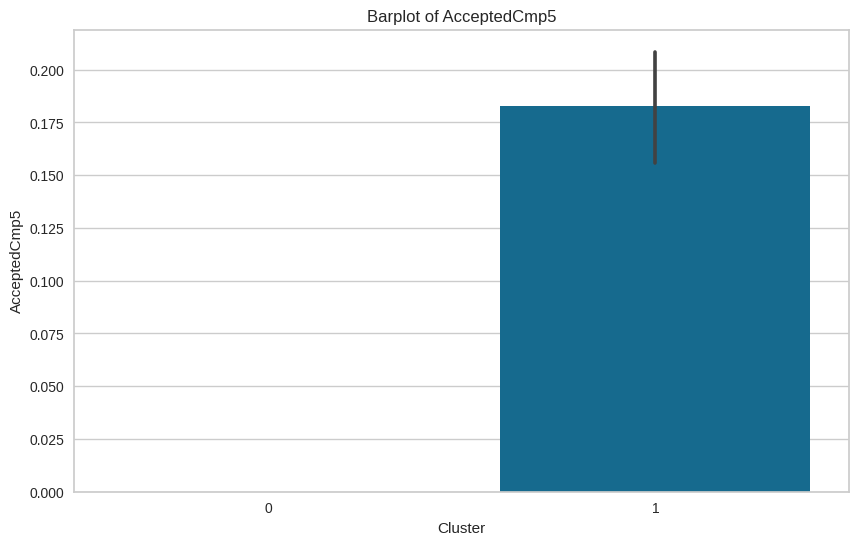

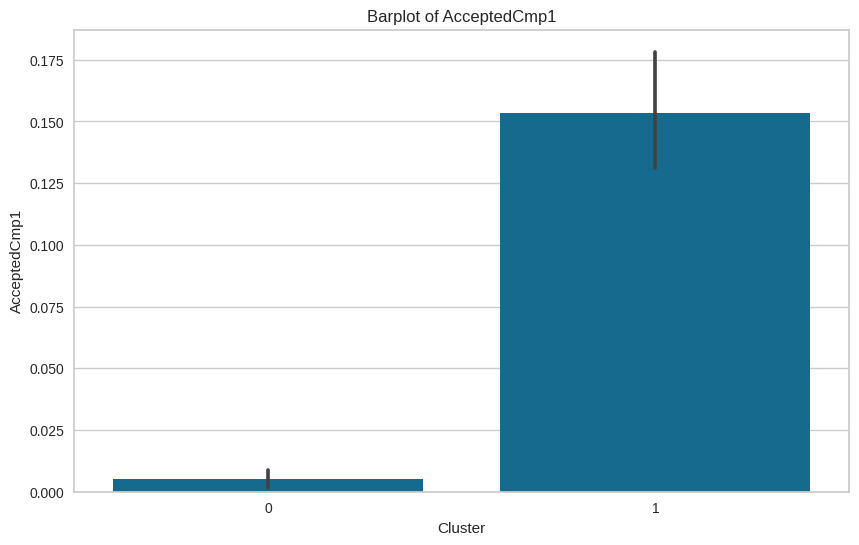

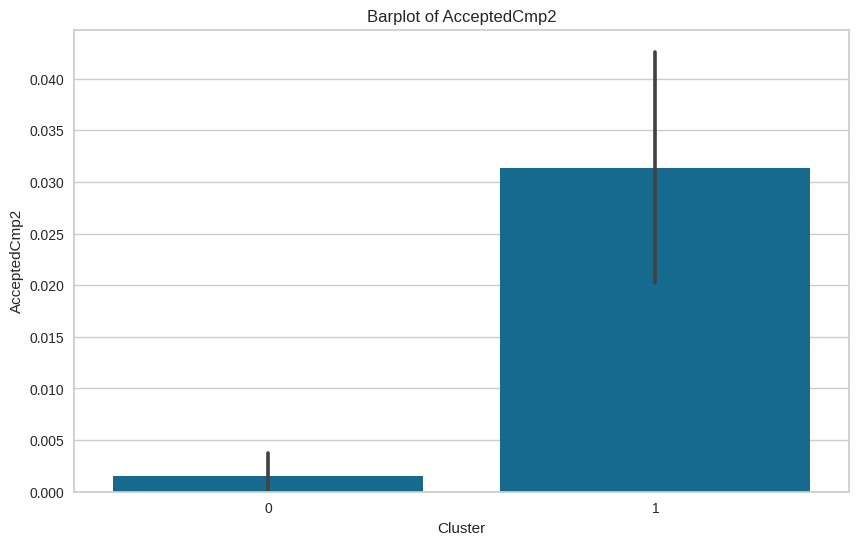

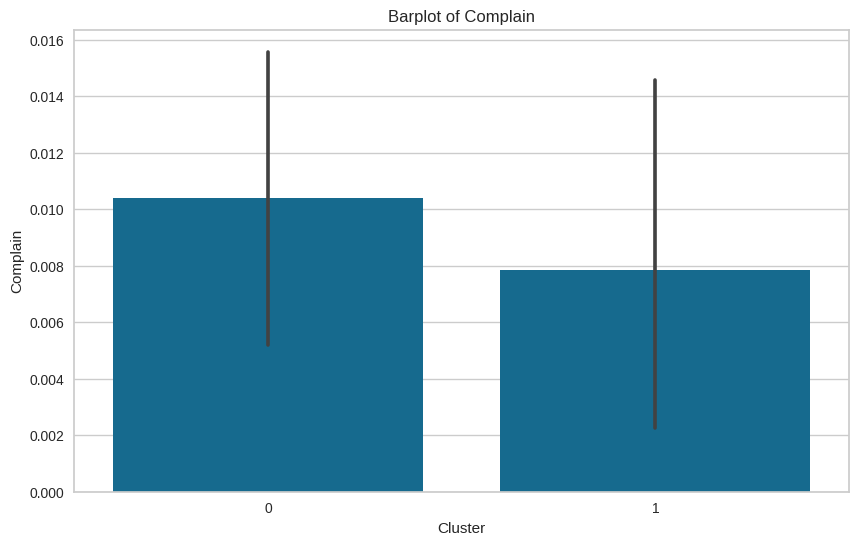

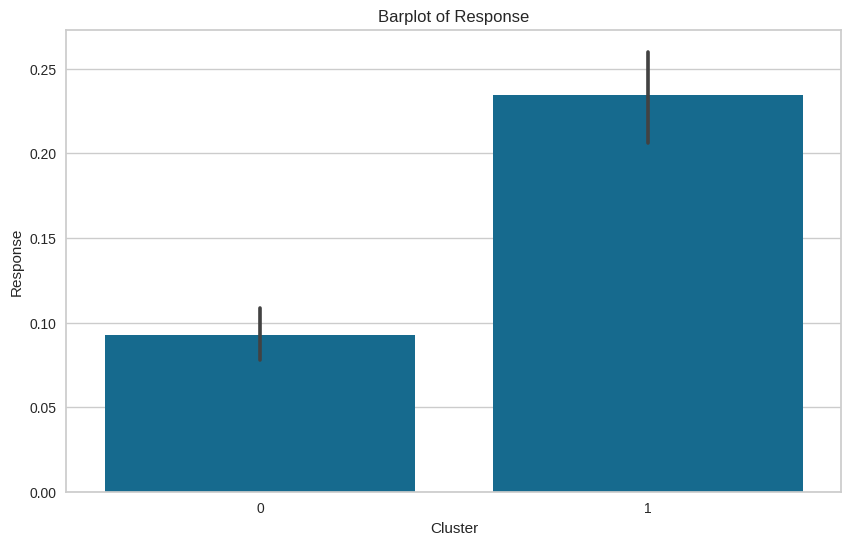

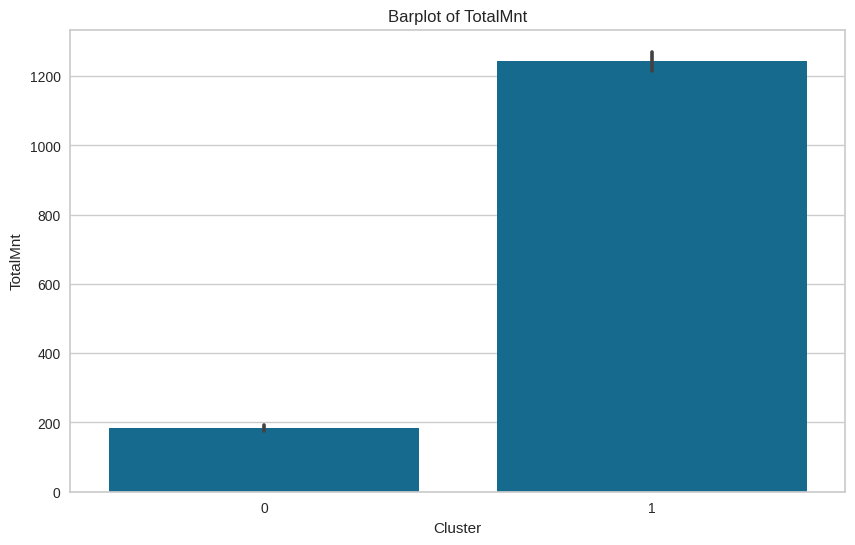

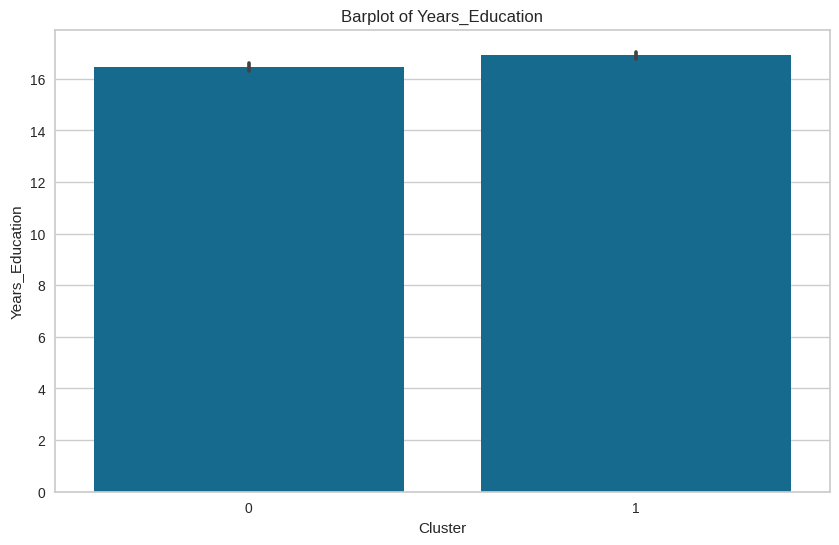

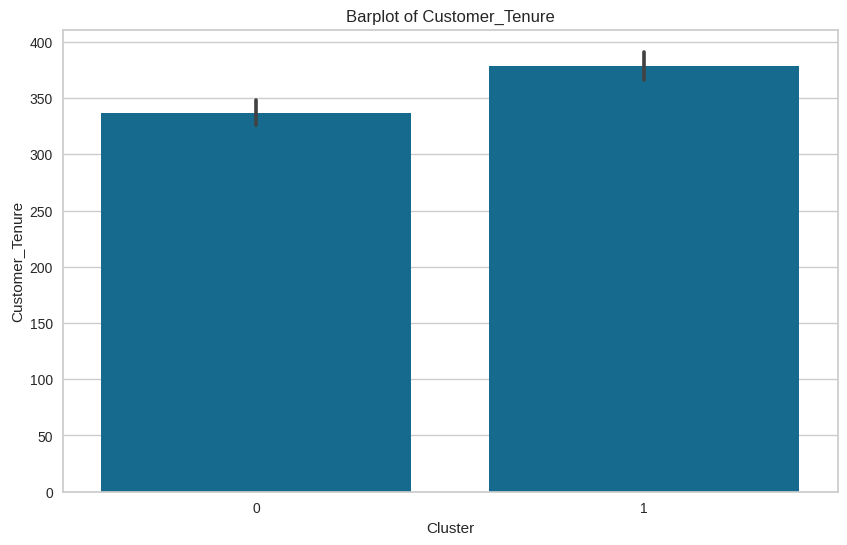

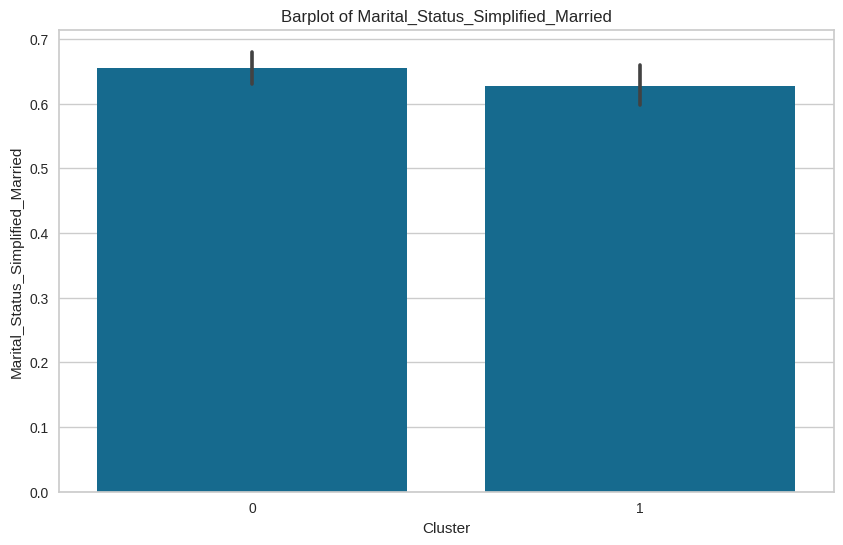

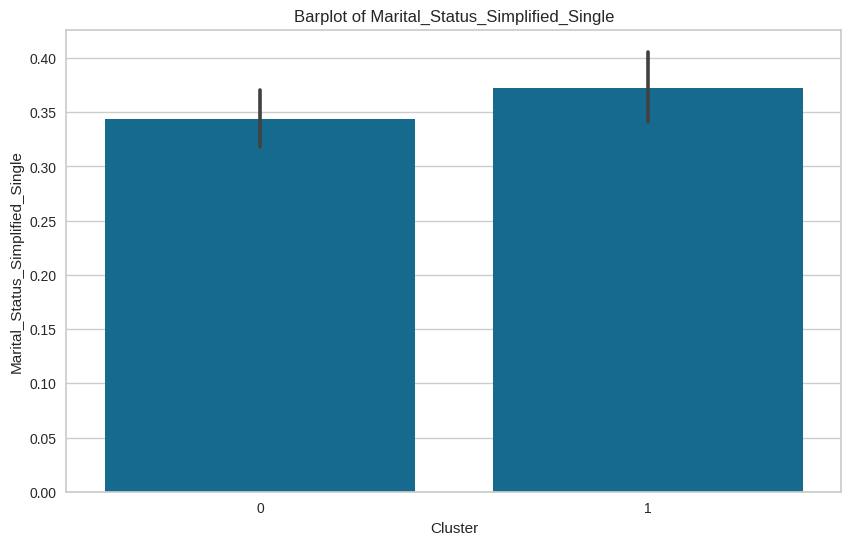

In [129]:
# Write your code here
for feature in num_var.columns:
  plt.figure(figsize=(10,6))
  sns.barplot(x='Cluster', y=feature, data=data)
  plt.title(f'Barplot of {feature}')
  plt.show()

In [130]:
# Calculate the 5-number summary of numerical features for each cluster
cluster_summary = data.groupby('Cluster')[num_var.columns].agg(['min', lambda x: x.quantile(0.25), 'median', lambda x: x.quantile(0.75), 'max'])

# Rename the columns for clarity
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]
cluster_summary = cluster_summary.rename(columns={
    col: col.replace('<lambda_0>', 'Q1').replace('<lambda_1>', 'Q3') for col in cluster_summary.columns
})

# Display the table of cluster summary
display(cluster_summary)

,ID_min,ID_Q1,ID_median,ID_Q3,ID_max,Year_Birth_min,Year_Birth_Q1,Year_Birth_median,Year_Birth_Q3,Year_Birth_max,Income_min,Income_Q1,Income_median,Income_Q3,Income_max,Kidhome_min,Kidhome_Q1,Kidhome_median,Kidhome_Q3,Kidhome_max,Teenhome_min,Teenhome_Q1,Teenhome_median,Teenhome_Q3,Teenhome_max,Recency_min,Recency_Q1,Recency_median,Recency_Q3,Recency_max,MntWines_min,MntWines_Q1,MntWines_median,MntWines_Q3,MntWines_max,MntFruits_min,MntFruits_Q1,MntFruits_median,MntFruits_Q3,MntFruits_max,MntMeatProducts_min,MntMeatProducts_Q1,MntMeatProducts_median,MntMeatProducts_Q3,MntMeatProducts_max,MntFishProducts_min,MntFishProducts_Q1,MntFishProducts_median,MntFishProducts_Q3,MntFishProducts_max,MntSweetProducts_min,MntSweetProducts_Q1,MntSweetProducts_median,MntSweetProducts_Q3,MntSweetProducts_max,MntGoldProds_min,MntGoldProds_Q1,MntGoldProds_median,MntGoldProds_Q3,MntGoldProds_max,NumDealsPurchases_min,NumDealsPurchases_Q1,NumDealsPurchases_median,NumDealsPurchases_Q3,NumDealsPurchases_max,NumWebPurchases_min,NumWebPurchases_Q1,NumWebPurchases_median,NumWebPurchases_Q3,NumWebPurchases_max,NumCatalogPurchases_min,NumCatalogPurchases_Q1,NumCatalogPurchases_median,NumCatalogPurchases_Q3,NumCatalogPurchases_max,NumStorePurchases_min,NumStorePurchases_Q1,NumStorePurchases_median,NumStorePurchases_Q3,NumStorePurchases_max,NumWebVisitsMonth_min,NumWebVisitsMonth_Q1,NumWebVisitsMonth_median,NumWebVisitsMonth_Q3,NumWebVisitsMonth_max,AcceptedCmp3_min,AcceptedCmp3_Q1,AcceptedCmp3_median,AcceptedCmp3_Q3,AcceptedCmp3_max,AcceptedCmp4_min,AcceptedCmp4_Q1,AcceptedCmp4_median,AcceptedCmp4_Q3,AcceptedCmp4_max,AcceptedCmp5_min,AcceptedCmp5_Q1,AcceptedCmp5_median,AcceptedCmp5_Q3,AcceptedCmp5_max,AcceptedCmp1_min,AcceptedCmp1_Q1,AcceptedCmp1_median,AcceptedCmp1_Q3,AcceptedCmp1_max,AcceptedCmp2_min,AcceptedCmp2_Q1,AcceptedCmp2_median,AcceptedCmp2_Q3,AcceptedCmp2_max,Complain_min,Complain_Q1,Complain_median,Complain_Q3,Complain_max,Response_min,Response_Q1,Response_median,Response_Q3,Response_max,TotalMnt_min,TotalMnt_Q1,TotalMnt_median,TotalMnt_Q3,TotalMnt_max,Years_Education_min,Years_Education_Q1,Years_Education_median,Years_Education_Q3,Years_Education_max,Customer_Tenure_min,Customer_Tenure_Q1,Customer_Tenure_median,Customer_Tenure_Q3,Customer_Tenure_max,Marital_Status_Simplified_Married_min,Marital_Status_Simplified_Married_Q1,Marital_Status_Simplified_Married_median,Marital_Status_Simplified_Married_Q3,Marital_Status_Simplified_Married_max,Marital_Status_Simplified_Single_min,Marital_Status_Simplified_Single_Q1,Marital_Status_Simplified_Single_median,Marital_Status_Simplified_Single_Q3,Marital_Status_Simplified_Single_max
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9,2848.75,5511.0,8414.5,11191,1893,1962.0,1972.0,1978.0,1996,1730.0,28582.0,38566.5,49207.50,162397.0,0,0.0,1.0,1.0,2,0,0.0,1.0,1.0,2,0,24.0,49.0,74.0,99,0,11.00,35.0,143.25,789,0,1.0,3.0,8.00,123,0,9.0,20.0,54.00,253,0,2.0,4.0,12.0,179,0,1.0,3.0,9.00,157,0,5.0,12.0,28.0,262,0,1.0,2.0,3.0,15,0,1.0,2.0,4.0,11,0,0.0,1.0,1.0,6,0,3.0,3.0,5.0,12,0,5.0,7.0,8.0,20,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,5,45.0,91.0,283.25,1019,8,16.0,16.0,18.0,20,0,157.75,331.0,503.00,699,0,0.0,1.0,1.0,1,0,0.0,0.0,1.0,1
1,0,2805.75,5381.0,8495.0,11112,1899,1957.0,1967.0,1976.0,1995,2447.0,63810.0,71412.5,79700.25,666666.0,0,0.0,0.0,0.0,1,0,0.0,0.0,1.0,2,0,25.0,51.0,73.0,99,1,375.75,571.0,823.00,1493,0,19.0,40.0,81.25,199,3,168.0,300.0,499.25,1725,0,28.0,63.0,119.0,259,0,19.0,42.0,88.25,263,0,30.0,56.0,111.0,362,0,1.0,1.0,3.0,15,0,4.0,5.0,7.0,27,0,3.0,5.0,7.0,28,0,6.0,9.0,11.0,13,0,2.0,3.0,5.0,9,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1,62,926.0,1174.5,1538.00,2525,8,16.0,16.0,18.0,20,1,213.75,402.0,553.25,698,0,0.0,1.0,1.0,1,0,0.0,0.0,1.0,1


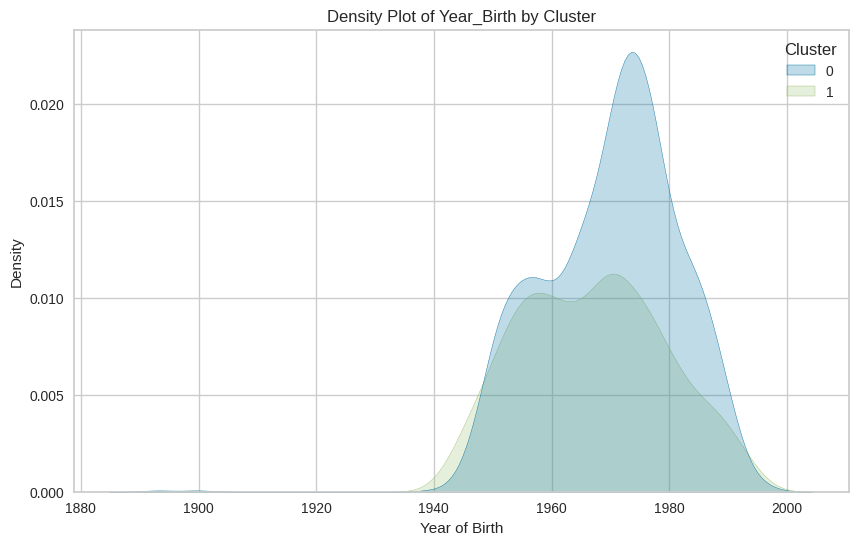

In [131]:
#Data suggests that Cluster 0 has more young people than Cluster 1, even though their means do not show it. I am using a KDE plot to confirm that Cluster 0 (the lower income cluster) has more young people than Cluster 1.
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='Year_Birth', hue='Cluster', fill=True)
plt.title('Density Plot of Year_Birth by Cluster')
plt.xlabel('Year of Birth')
plt.ylabel('Density')
plt.show()

##### **Observations:**

Cluster 1 families are less likely to complain than Cluster 0.

Cluster 1 families are more likely to respond to marketing campaigns than Cluster 0. However, note that Cluster 0 responded much better to Campaign 3 than they did to the other Campaigns.

Cluster 1 tends to have a longer tenure with the company than Cluster 0.

## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business recommendations can be provided?

In conclusion, customers fall into two distinct groups, Cluster 1 and Cluster 0. Cluster 1 tends to be older, more affluent, more educated than Cluster 0. They also have fewer small children and are more likely to be married.

These things have a strong impact on their respective spending habits. Cluster 1 spends significantly more than Cluster 0 and is generally more likely to respond to marketing campaigns. They tend to have a longer tenure with the company than Cluster 0 as well.

Cluster 0 is more likely to complain than Cluster 1. This is likely due to Cluster 0 families' greater levels of economic hardship; this greater hardship could impact them in multiple ways, including stress and a greater need to seek out deals.

Interestingly, Even though Cluster 1 is more likely to buy products online than Cluster 0, they actually spend less time on the company's website. This could be for a number of reason, including:
  1. Cluster 1 makes purchases more efficiently.
  2. Cluster 1 makes higher value purchases per visit even though they don't visit as often.
  3. Cluster 1 prefers to make use of other channel such as the store catalog and in-store purchases.
  4. Cluster 1 has less incentive to hunt for bargains than Cluster 0.
Of these possibilities, I find the fourth option most compelling. It is most likely the case that Cluster 0 families spend more time online searching for bargains than Cluster 1 families, who instead go online already knowing exactly what they want to buy and far less concerned what it will cost.

Additionally, Cluster 1 families seem to prefer shopping by catalog to shopping via the internet. Potential reasons include:
  1. More appealing browsing experience.
  2. Catalogs have more offerings targeted specifically towards wealthier families.
  3. Older demographics prefer shopping by catalog to shopping online.

Furthermore, Cluster 1 families were more likely to respond to marketing campaigns than Cluster 0 families. This is likely primarily due to Cluster 1 families' greater economic stability enabling them to purchase more freely. However, it must be noted that Campaign 3 was unusually effective in garnering responses from Cluster 0 families.

My business recommendations are:
  1. Develop tailored marketing campaigns:
    - Determine why Campaign 3 was more successful than others to   retain Cluster 0 families as customers and improve sales. Focus on value deals and promotions, and highlight products relevant to families with children.
    - Target Cluster 1 by designing campaigns which emphasize quality, exclusivity, and premium products such as fine wines and high-end meat products.
  2. For Cluster 1, implement a loyalty program that rewards high spending with significant benefits, and maintain consistent communication to acknowledge these customers' value.
  3. For Cluster 0, focus on addressing their complaints promptly and effectively to build trust, and offer targeted discounts and loyalty incentives tied to repeat purchases.
  4. Ensure adequate stocking of high-value products in specific areas of the store or online spaces which Cluster 1 can access easily and exclusively. Similarly, group value-oriented products so that they can be quickly accessed by Cluster 0.
  5. Focus on tailoring in-store layouts such that products are grouped together based upon whether they are bought primarily by Cluster 1 or Cluster 0. Additionally, create an environment which is comfortable and enticing to each group; for Cluster 1, focus on a high-end feel and, for Cluster 0, emphasize sales and family-oriented products.
  6. Continuously monitor these strategies to ensure continued effectiveness and identify potential areas for improvement.
